In [1]:
!pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn scipy openpyxl

## Environment Setup and Data Loading



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve,
                             auc, classification_report)
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

df = pd.read_csv('D:\Studies\College\VIT\Sem 5\ML\Lab\Datasets lab\ToN-IoT\LAB_ToN_IoT.csv')
print(f"\nDataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nDataset info:\n{df.info()}")
print(f"\nDataset statistics:\n{df.describe()}")


Dataset loaded successfully!
Dataset shape: (133794, 86)

First few rows:
   Unnamed: 0                                 Flow ID         Src IP  \
0     1909167   176.28.50.165-192.168.1.32-80-49056-6  176.28.50.165   
1     5064909   52.28.231.150-192.168.1.35-80-58548-6  52.28.231.150   
2      589938  192.168.1.193-192.168.1.33-445-33721-6  192.168.1.193   
3     1126246   52.28.231.150-192.168.1.36-80-34034-6  52.28.231.150   
4     1827801   192.168.1.190-192.168.1.36-80-41390-6  192.168.1.190   

   Src Port        Dst IP  Dst Port  Protocol               Timestamp  \
0        80  192.168.1.32     49056         6  27/04/2019 04:47:51 pm   
1        80  192.168.1.35     58548         6  27/04/2019 10:37:54 pm   
2       445  192.168.1.33     33721         6  28/04/2019 02:57:14 pm   
3        80  192.168.1.36     34034         6  27/04/2019 03:51:29 pm   
4        80  192.168.1.36     41390         6  27/04/2019 04:39:33 pm   

   Flow Duration  Tot Fwd Pkts  ...  Active Mean  Act

In [26]:
# Define attack types based on your data
ATTACK_TYPES = {
    'Benign': 0,
    'xss': 1,
    'password': 2,
    'injection': 3,
    'scanning': 4,
    'backdoor': 5,
    'ransomware': 6,
    'mitm': 7,
    'ddos': 8,
    'dos': 9
}

In [27]:
# Display class distribution
print(f"\n{'='*80}")
print("CLASS DISTRIBUTION ANALYSIS - MULTI-CLASS")
print(f"{'='*80}")
print(f"\nClass distribution:\n{df['Attack'].value_counts()}")
print(f"\nClass distribution (%):\n{df['Attack'].value_counts(normalize=True) * 100}")



CLASS DISTRIBUTION ANALYSIS - MULTI-CLASS

Class distribution:
Attack
Benign        62881
xss           53656
password       8472
injection      7081
scanning        925
backdoor        646
ransomware      115
mitm             10
ddos              5
dos               3
Name: count, dtype: int64

Class distribution (%):
Attack
Benign        46.998371
xss           40.103443
password       6.332123
injection      5.292465
scanning       0.691361
backdoor       0.482832
ransomware     0.085953
mitm           0.007474
ddos           0.003737
dos            0.002242
Name: proportion, dtype: float64


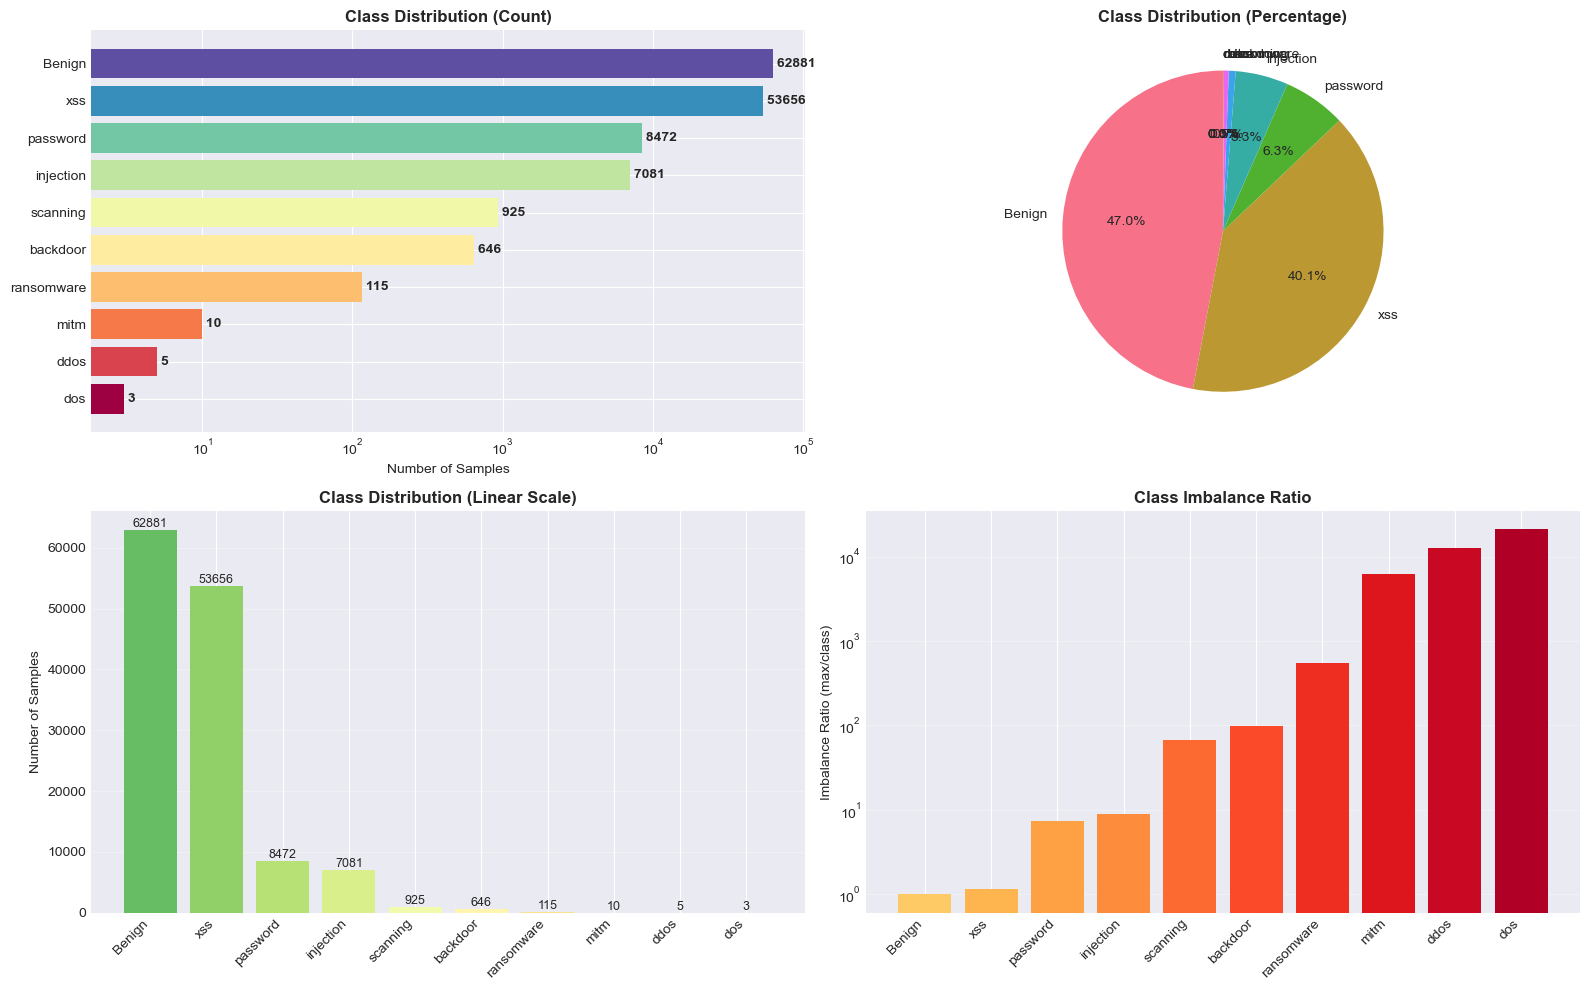


✓ Multi-class distribution visualization saved as '01_multiclass_distribution.png'


In [28]:
# Visualize multi-class imbalance
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Count distribution (log scale)
ax1 = axes[0, 0]
counts = df['Attack'].value_counts().sort_values(ascending=True)
ax1.barh(range(len(counts)), counts.values, color=plt.cm.Spectral(np.linspace(0, 1, len(counts))))
ax1.set_yticks(range(len(counts)))
ax1.set_yticklabels(counts.index)
ax1.set_xlabel('Number of Samples')
ax1.set_title('Class Distribution (Count)', fontsize=12, fontweight='bold')
ax1.set_xscale('log')
for i, v in enumerate(counts.values):
    ax1.text(v, i, f' {v}', va='center', fontweight='bold')

# Plot 2: Percentage distribution
ax2 = axes[0, 1]
percentages = df['Attack'].value_counts(normalize=True) * 100
ax2.pie(percentages.values, labels=percentages.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Class Distribution (Percentage)', fontsize=12, fontweight='bold')

# Plot 3: Linear count distribution
ax3 = axes[1, 0]
counts_sorted = df['Attack'].value_counts().sort_values(ascending=False)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(counts_sorted)))
bars = ax3.bar(range(len(counts_sorted)), counts_sorted.values, color=colors)
ax3.set_xticks(range(len(counts_sorted)))
ax3.set_xticklabels(counts_sorted.index, rotation=45, ha='right')
ax3.set_ylabel('Number of Samples')
ax3.set_title('Class Distribution (Linear Scale)', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Plot 4: Imbalance ratio
ax4 = axes[1, 1]
max_count = counts_sorted.max()
imbalance_ratios = max_count / counts_sorted
colors_imbalance = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(imbalance_ratios)))
bars = ax4.bar(range(len(imbalance_ratios)), imbalance_ratios.values, color=colors_imbalance)
ax4.set_xticks(range(len(imbalance_ratios)))
ax4.set_xticklabels(imbalance_ratios.index, rotation=45, ha='right')
ax4.set_ylabel('Imbalance Ratio (max/class)')
ax4.set_title('Class Imbalance Ratio', fontsize=12, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.savefig('01_multiclass_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Multi-class distribution visualization saved as '01_multiclass_distribution.png'")


## Multi-Class Data Preprocessing

In [41]:
# Separate features and labels
X = df.drop('Attack', axis=1)
y = df['Attack']

# Encode categorical variables if present
label_encoders = {}
categorical_columns = X.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
    print(f"Encoded column '{col}' with {len(le.classes_)} unique values")

# Replace inf and -inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values if any
X = X.fillna(X.mean())
print(f"\nMissing values handled. Shape: {X.shape}")

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Encode target variable (multi-class)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"\nFeature scaling completed")
print(f"X shape: {X_scaled.shape}")
print(f"y shape: {y_encoded.shape}")
print(f"Target classes: {le_target.classes_}")
print(f"Number of classes: {len(le_target.classes_)}")

Encoded column 'Flow ID' with 117334 unique values
Encoded column 'Src IP' with 12108 unique values
Encoded column 'Dst IP' with 412 unique values
Encoded column 'Timestamp' with 33152 unique values

Missing values handled. Shape: (133794, 85)

Feature scaling completed
X shape: (133794, 85)
y shape: (133794,)
Target classes: ['Benign' 'backdoor' 'ddos' 'dos' 'injection' 'mitm' 'password'
 'ransomware' 'scanning' 'xss']
Number of classes: 10



Balanced dataset shape: (11704, 86)
New class distribution:
Attack
0    2500
4    2500
9    2500
6    2500
8     925
1     646
7     115
5      10
2       5
3       3
Name: count, dtype: int64


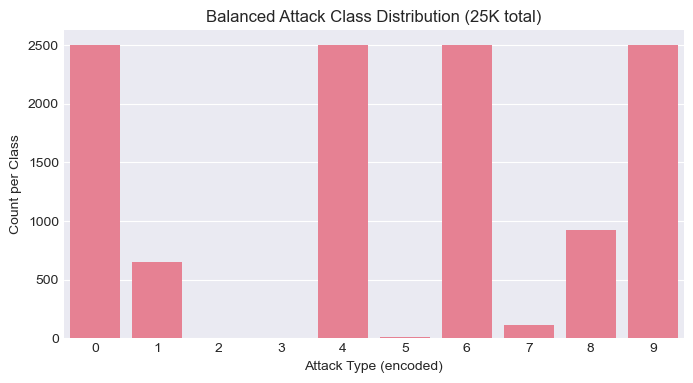

In [42]:
# Combine X_scaled and y_encoded into one DataFrame for easy sampling
df_processed = X_scaled.copy()
df_processed['Attack'] = y_encoded

# Total samples desired
total_samples = 25000

# Calculate how many samples per class
classes = df_processed['Attack'].unique()
num_classes = len(classes)
samples_per_class = total_samples // num_classes

# Stratified balanced sampling
balanced_df = (
    df_processed.groupby('Attack', group_keys=False)
    .apply(lambda x: x.sample(n=min(samples_per_class, len(x)), random_state=42))
    .reset_index(drop=True)
)

print(f"\nBalanced dataset shape: {balanced_df.shape}")
print("New class distribution:")
print(balanced_df['Attack'].value_counts())

# Split features and labels again
X_balanced = balanced_df.drop('Attack', axis=1)
y_balanced = balanced_df['Attack']

# Visualize new class balance
plt.figure(figsize=(8,4))
sns.countplot(x=y_balanced)
plt.title("Balanced Attack Class Distribution (25K total)")
plt.xlabel("Attack Type (encoded)")
plt.ylabel("Count per Class")
plt.show()


In [43]:
# Train-test split (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

print(f"\n✓ Train-test split completed")
print(f"Training set: {X_train.shape} samples")
print(f"Test set: {X_test.shape} samples")
print(f"\nTraining set class distribution:")
for i, cls_name in enumerate(le_target.classes_):
    count = np.sum(y_train == i)
    pct = count / len(y_train) * 100
    print(f"  {cls_name:15s}: {count:6d} samples ({pct:5.2f}%)")

print(f"\nTest set class distribution:")
for i, cls_name in enumerate(le_target.classes_):
    count = np.sum(y_test == i)
    pct = count / len(y_test) * 100
    print(f"  {cls_name:15s}: {count:6d} samples ({pct:5.2f}%)")



✓ Train-test split completed
Training set: (8192, 85) samples
Test set: (3512, 85) samples

Training set class distribution:
  Benign         :   1750 samples (21.36%)
  backdoor       :    452 samples ( 5.52%)
  ddos           :      4 samples ( 0.05%)
  dos            :      2 samples ( 0.02%)
  injection      :   1750 samples (21.36%)
  mitm           :      7 samples ( 0.09%)
  password       :   1750 samples (21.36%)
  ransomware     :     80 samples ( 0.98%)
  scanning       :    647 samples ( 7.90%)
  xss            :   1750 samples (21.36%)

Test set class distribution:
  Benign         :    750 samples (21.36%)
  backdoor       :    194 samples ( 5.52%)
  ddos           :      1 samples ( 0.03%)
  dos            :      1 samples ( 0.03%)
  injection      :    750 samples (21.36%)
  mitm           :      3 samples ( 0.09%)
  password       :    750 samples (21.36%)
  ransomware     :     35 samples ( 1.00%)
  scanning       :    278 samples ( 7.92%)
  xss            :    750 s

## Multi-Class Imbalance Handling Methods

In [44]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# Dictionary to store all handled datasets
handled_datasets = {}

In [45]:
# -------- Method 1: Under-sampling (Random) --------
print("\n[1/5] Applying Random Under-sampling...")
try:
    undersampler = RandomUnderSampler(random_state=42, sampling_strategy='not majority')
    X_under, y_under = undersampler.fit_resample(X_train, y_train)
    handled_datasets['Under-sampling'] = (X_under, y_under)
    print(f"✓ Under-sampling complete. Shape: {X_under.shape}")
    for i, cls_name in enumerate(le_target.classes_):
        count = np.sum(y_under == i)
        print(f"  {cls_name:15s}: {count:6d} samples")
except Exception as e:
    print(f"⚠ Under-sampling error: {str(e)}")
    handled_datasets['Under-sampling'] = (X_train, y_train)


[1/5] Applying Random Under-sampling...
✓ Under-sampling complete. Shape: (1768, 85)
  Benign         :   1750 samples
  backdoor       :      2 samples
  ddos           :      2 samples
  dos            :      2 samples
  injection      :      2 samples
  mitm           :      2 samples
  password       :      2 samples
  ransomware     :      2 samples
  scanning       :      2 samples
  xss            :      2 samples


In [46]:
# -------- Method 2: Over-sampling (Random) --------
print("\n[2/5] Applying Random Over-sampling...")
try:
    oversampler = RandomOverSampler(random_state=42, sampling_strategy='not majority')
    X_over, y_over = oversampler.fit_resample(X_train, y_train)
    handled_datasets['Over-sampling'] = (X_over, y_over)
    print(f"✓ Over-sampling complete. Shape: {X_over.shape}")
    for i, cls_name in enumerate(le_target.classes_):
        count = np.sum(y_over == i)
        print(f"  {cls_name:15s}: {count:6d} samples")
except Exception as e:
    print(f"⚠ Over-sampling error: {str(e)}")
    handled_datasets['Over-sampling'] = (X_train, y_train)


[2/5] Applying Random Over-sampling...
✓ Over-sampling complete. Shape: (17500, 85)
  Benign         :   1750 samples
  backdoor       :   1750 samples
  ddos           :   1750 samples
  dos            :   1750 samples
  injection      :   1750 samples
  mitm           :   1750 samples
  password       :   1750 samples
  ransomware     :   1750 samples
  scanning       :   1750 samples
  xss            :   1750 samples


In [47]:
print("\n[3/5] Applying SMOTE (Multi-class variant)...")
try:
    # Find smallest class size
    min_class_size = np.min(np.bincount(y_train))
    k_neighbors = min(3, max(1, min_class_size - 1))  # ensure valid value

    smote = SMOTE(random_state=42, k_neighbors=k_neighbors, sampling_strategy='not majority')
    X_smote, y_smote = smote.fit_resample(X_train, y_train)
    handled_datasets['SMOTE'] = (X_smote, y_smote)

    print(f"✓ SMOTE complete (k_neighbors={k_neighbors}). Shape: {X_smote.shape}")
    for i, cls_name in enumerate(le_target.classes_):
        count = np.sum(y_smote == i)
        print(f"  {cls_name:15s}: {count:6d} samples")

except Exception as e:
    print(f"⚠ SMOTE error: {str(e)}")
    handled_datasets['SMOTE'] = (X_train, y_train)



[3/5] Applying SMOTE (Multi-class variant)...
✓ SMOTE complete (k_neighbors=1). Shape: (17500, 85)
  Benign         :   1750 samples
  backdoor       :   1750 samples
  ddos           :   1750 samples
  dos            :   1750 samples
  injection      :   1750 samples
  mitm           :   1750 samples
  password       :   1750 samples
  ransomware     :   1750 samples
  scanning       :   1750 samples
  xss            :   1750 samples


In [48]:
# -------- Method 4: Multi-Class SVM (Supervised Classification) --------
print("\n[4/5] Applying Multi-Class SVM (Supervised Classification)...")
try:
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline

    # Create a pipeline with scaling + SVM
    multi_svm = make_pipeline(
        StandardScaler(),
        SVC(
            kernel='rbf',                   # RBF kernel (non-linear)
            C=5,                            # Regularization parameter
            gamma='scale',                  # Auto-scale gamma
            decision_function_shape='ovo',  # One-vs-One strategy
            random_state=42
        )
    )

    print("Training Multi-Class SVM on full training data...")
    multi_svm.fit(X_train, y_train)

    # Predict on training data (you can later use X_test as well)
    y_pred_svm = multi_svm.predict(X_train)

    # Store results
    handled_datasets['Multi-Class SVM'] = (X_train, y_pred_svm)

    print(f"✓ Multi-Class SVM training complete. Shape: {X_train.shape}")
    print("\nPredicted sample counts:")
    for i, cls_name in enumerate(le_target.classes_):
        count = np.sum(y_pred_svm == i)
        print(f"  {cls_name:15s}: {count:6d} predicted samples")

except Exception as e:
    print(f"⚠ Multi-Class SVM error: {str(e)}")
    handled_datasets['Multi-Class SVM'] = (X_train, y_train)



[4/5] Applying Multi-Class SVM (Supervised Classification)...
Training Multi-Class SVM on full training data...
✓ Multi-Class SVM training complete. Shape: (8192, 85)

Predicted sample counts:
  Benign         :   1750 predicted samples
  backdoor       :    450 predicted samples
  ddos           :      6 predicted samples
  dos            :      0 predicted samples
  injection      :   1197 predicted samples
  mitm           :      7 predicted samples
  password       :   2681 predicted samples
  ransomware     :     82 predicted samples
  scanning       :    753 predicted samples
  xss            :   1266 predicted samples


In [49]:
# -------- Method 5: Isolation Forest (Anomaly-based) --------
print("\n[5/5] Applying Isolation Forest for Rare Class Identification...")
try:
    iso_forest = IsolationForest(contamination='auto', random_state=42, n_estimators=100)
    iso_predictions = iso_forest.fit_predict(X_train)
    # Convert: -1 (anomaly) maps to minority classes, 1 (normal) maps to majority
    # Keep original labels but flag rare samples
    y_iso_pseudo = y_train.copy()
    handled_datasets['Isolation Forest'] = (X_train, y_iso_pseudo)
    print(f"✓ Isolation Forest complete.")
    print(f"  Predicted anomalies: {np.sum(iso_predictions == -1)}")
except Exception as e:
    print(f"⚠ Isolation Forest error: {str(e)}")
    handled_datasets['Isolation Forest'] = (X_train, y_train)


[5/5] Applying Isolation Forest for Rare Class Identification...
✓ Isolation Forest complete.
  Predicted anomalies: 636


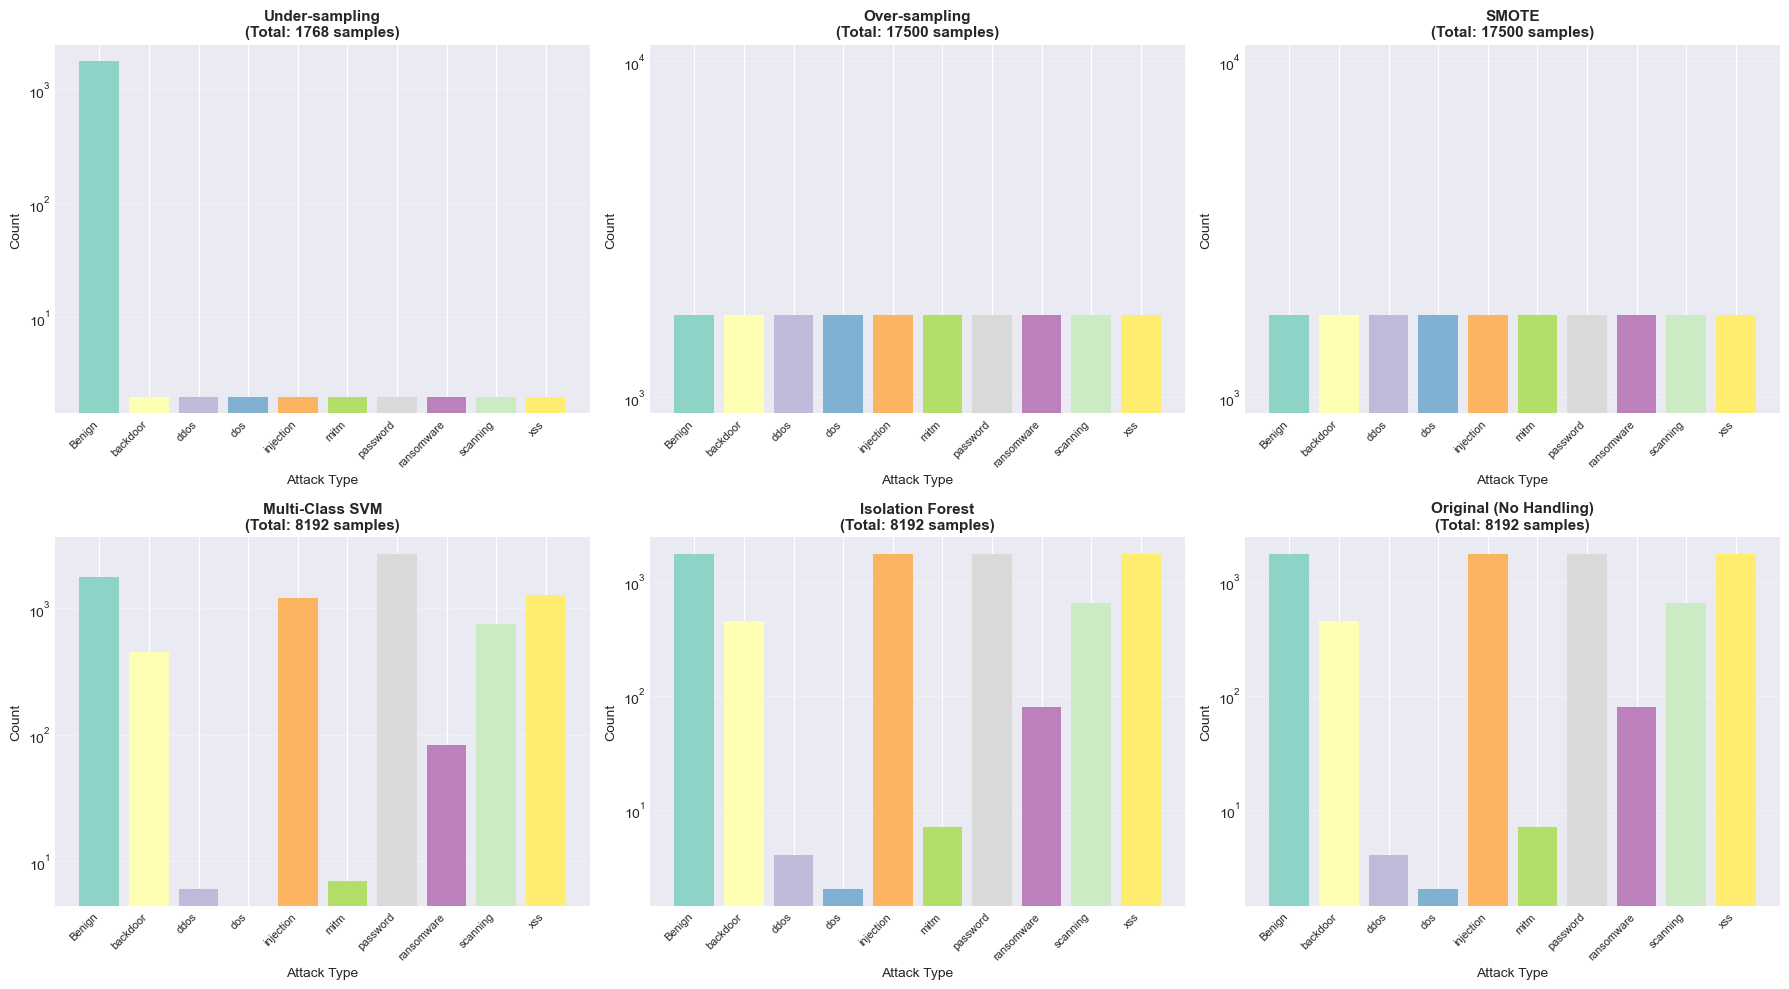


✓ Imbalance handling visualization saved as '02_multiclass_imbalance_handling.png'


In [50]:
# Also include original training data
handled_datasets['Original (No Handling)'] = (X_train, y_train)

# Visualize the impact of each method
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, (method_name, (X_method, y_method)) in enumerate(handled_datasets.items()):
    ax = axes[idx]
    class_counts = np.zeros(len(le_target.classes_))
    for i in range(len(le_target.classes_)):
        class_counts[i] = np.sum(y_method == i)

    colors = plt.cm.Set3(np.linspace(0, 1, len(le_target.classes_)))
    ax.bar(range(len(le_target.classes_)), class_counts, color=colors)
    ax.set_title(f'{method_name}\n(Total: {len(y_method)} samples)',
                fontsize=11, fontweight='bold')
    ax.set_xlabel('Attack Type')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(le_target.classes_)))
    ax.set_xticklabels(le_target.classes_, rotation=45, ha='right', fontsize=8)
    ax.set_yscale('log')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('02_multiclass_imbalance_handling.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Imbalance handling visualization saved as '02_multiclass_imbalance_handling.png'")

##  Define and Train Multi-Class Classifiers

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [52]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial'),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42, decision_function_shape='ovr'),
}

print("\nClassifiers to be evaluated:")
for i, clf_name in enumerate(classifiers.keys(), 1):
    print(f"  {i}. {clf_name}")


Classifiers to be evaluated:
  1. Decision Tree
  2. Naive Bayes
  3. Logistic Regression
  4. KNN (k=5)
  5. Random Forest
  6. Gradient Boosting
  7. AdaBoost
  8. SVM


In [53]:
# Dictionary to store all trained models
trained_models = {}

In [54]:
handled_datasets.keys()

dict_keys(['Under-sampling', 'Over-sampling', 'SMOTE', 'Multi-Class SVM', 'Isolation Forest', 'Original (No Handling)'])

In [55]:
def train_classifiers(classifiers, method_name, dataset, trained_models=None):
    if trained_models is None:
        trained_models = {}

    # Get the data for the given method
    if method_name not in dataset:
        print(f"⚠ Method '{method_name}' not found in dataset keys: {list(dataset.keys())}")
        return trained_models

    X_method, y_method = dataset[method_name]

    print(f"\n{'─'*80}")
    print(f"Training classifiers on: {method_name}")
    print(f"{'─'*80}")

    trained_models[method_name] = {}

    for clf_name, clf in classifiers.items():
        try:
            clf.fit(X_method, y_method)
            trained_models[method_name][clf_name] = clf

            # Get training accuracy
            train_pred = clf.predict(X_method)
            train_acc = accuracy_score(y_method, train_pred)
            print(f"  ✓ {clf_name:20s} - Train Accuracy: {train_acc:.4f}")

        except Exception as e:
            print(f"  ⚠ {clf_name:20s} - Error: {str(e)[:80]}")
            trained_models[method_name][clf_name] = None

    print(f"\n✓ Training completed for method: {method_name}")
    print(f"{'─'*80}")

    return trained_models


- Training with Under Sampling Dataset

In [ ]:
trained_models = train_classifiers(classifiers,'Under-sampling',handled_datasets,trained_models)

- Training with Over Sampling Dataset

In [ ]:
trained_models = train_classifiers(classifiers,'Over-sampling',handled_datasets,trained_models)


────────────────────────────────────────────────────────────────────────────────
Training classifiers on: Over-sampling
────────────────────────────────────────────────────────────────────────────────
  ✓ Decision Tree        - Train Accuracy: 0.9322
  ✓ Naive Bayes          - Train Accuracy: 0.7247
  ✓ Logistic Regression  - Train Accuracy: 0.8449
  ✓ KNN (k=5)            - Train Accuracy: 0.8989
  ✓ Random Forest        - Train Accuracy: 0.9999


- Training with SMOTE Dataset

In [59]:
trained_models = train_classifiers(classifiers,'SMOTE',handled_datasets,trained_models)


────────────────────────────────────────────────────────────────────────────────
Training classifiers on: SMOTE
────────────────────────────────────────────────────────────────────────────────
  ✓ Decision Tree        - Train Accuracy: 0.9370
  ✓ Naive Bayes          - Train Accuracy: 0.7524
  ✓ Logistic Regression  - Train Accuracy: 0.8544
  ✓ KNN (k=5)            - Train Accuracy: 0.8999
  ✓ Random Forest        - Train Accuracy: 0.9999
  ✓ Gradient Boosting    - Train Accuracy: 0.9175
  ✓ AdaBoost             - Train Accuracy: 0.3903
  ✓ SVM                  - Train Accuracy: 0.8191

✓ Training completed for method: SMOTE
────────────────────────────────────────────────────────────────────────────────


- Training with Multi Class SVM Dataset

In [60]:
trained_models = train_classifiers(classifiers,'Multi-Class SVM',handled_datasets,trained_models)


────────────────────────────────────────────────────────────────────────────────
Training classifiers on: Multi-Class SVM
────────────────────────────────────────────────────────────────────────────────
  ✓ Decision Tree        - Train Accuracy: 0.9994
  ✓ Naive Bayes          - Train Accuracy: 0.7637
  ✓ Logistic Regression  - Train Accuracy: 0.9406
  ✓ KNN (k=5)            - Train Accuracy: 0.9678
  ✓ Random Forest        - Train Accuracy: 1.0000
  ✓ Gradient Boosting    - Train Accuracy: 0.9929
  ✓ AdaBoost             - Train Accuracy: 0.3998
  ✓ SVM                  - Train Accuracy: 0.9385

✓ Training completed for method: Multi-Class SVM
────────────────────────────────────────────────────────────────────────────────


- Training with Isolation Forest Dataset

In [61]:
trained_models = train_classifiers(classifiers,'Isolation Forest',handled_datasets,trained_models)


────────────────────────────────────────────────────────────────────────────────
Training classifiers on: Isolation Forest
────────────────────────────────────────────────────────────────────────────────
  ✓ Decision Tree        - Train Accuracy: 0.8495
  ✓ Naive Bayes          - Train Accuracy: 0.6372
  ✓ Logistic Regression  - Train Accuracy: 0.7076
  ✓ KNN (k=5)            - Train Accuracy: 0.7885
  ✓ Random Forest        - Train Accuracy: 1.0000
  ✓ Gradient Boosting    - Train Accuracy: 0.8396
  ✓ AdaBoost             - Train Accuracy: 0.3480
  ✓ SVM                  - Train Accuracy: 0.7036

✓ Training completed for method: Isolation Forest
────────────────────────────────────────────────────────────────────────────────


- Training with Original Dataset

In [62]:
trained_models = train_classifiers(classifiers,'Original (No Handling)',handled_datasets,trained_models)


────────────────────────────────────────────────────────────────────────────────
Training classifiers on: Original (No Handling)
────────────────────────────────────────────────────────────────────────────────
  ✓ Decision Tree        - Train Accuracy: 0.8495
  ✓ Naive Bayes          - Train Accuracy: 0.6372
  ✓ Logistic Regression  - Train Accuracy: 0.7076
  ✓ KNN (k=5)            - Train Accuracy: 0.7885
  ✓ Random Forest        - Train Accuracy: 1.0000
  ✓ Gradient Boosting    - Train Accuracy: 0.8396
  ✓ AdaBoost             - Train Accuracy: 0.3480
  ✓ SVM                  - Train Accuracy: 0.7036

✓ Training completed for method: Original (No Handling)
────────────────────────────────────────────────────────────────────────────────


In [63]:
trained_models

{'SMOTE': {'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
  'Naive Bayes': GaussianNB(),
  'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
  'KNN (k=5)': KNeighborsClassifier(),
  'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=42),
  'Gradient Boosting': GradientBoostingClassifier(random_state=42),
  'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
  'SVM': SVC(probability=True, random_state=42)},
 'Multi-Class SVM': {'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
  'Naive Bayes': GaussianNB(),
  'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42),
  'KNN (k=5)': KNeighborsClassifier(),
  'Random Forest': RandomForestClassifier(n_jobs=-1, random_state=42),
  'Gradient Boosting': GradientBoostingClassifier(random_state=42),
  'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
  'SVM': S

## Multi Class Evaluation Metrics

In [69]:
from sklearn.metrics import roc_auc_score, auc, roc_curve

# Dictionary to store all evaluation metrics
evaluation_results = {}

def calculate_multiclass_metrics(y_true, y_pred, y_pred_proba=None):
    """Calculate comprehensive multi-class evaluation metrics"""

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted', zero_division=0),
        'Macro Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Macro Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'Macro F1': f1_score(y_true, y_pred, average='macro', zero_division=0),
        'Micro Precision': precision_score(y_true, y_pred, average='micro', zero_division=0),
        'Micro Recall': recall_score(y_true, y_pred, average='micro', zero_division=0),
        'Micro F1': f1_score(y_true, y_pred, average='micro', zero_division=0),
    }

    # Per-class metrics
    per_class_metrics = classification_report(y_true, y_pred, output_dict=True, zero_division=0)

    # AUC calculation (One-vs-Rest for multi-class)
    try:
        if y_pred_proba is not None:
            metrics['AUC_OvR'] = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', labels=np.unique(y_true))
        else:
            metrics['AUC_OvR'] = 0.0
    except:
        metrics['AUC_OvR'] = 0.0

    all_labels = range(len(le_target.classes_))
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)

    return metrics, per_class_metrics, cm

In [75]:
# Evaluate all method-classifier combinations
for method_name, clf_dict in trained_models.items():
    evaluation_results[method_name] = {}

    print(f"\n{'─'*80}")
    print(f"Evaluating: {method_name}")
    print(f"{'─'*80}")

    for clf_name, clf in clf_dict.items():
        if clf is None:
            continue

        try:
            # Get predictions
            y_pred = clf.predict(X_test)

            # Get probability predictions if available
            if hasattr(clf, 'predict_proba'):
                y_pred_proba = clf.predict_proba(X_test)
            else:
                y_pred_proba = None

            # Calculate metrics
            metrics, per_class, cm = calculate_multiclass_metrics(y_test, y_pred, y_pred_proba)
            evaluation_results[method_name][clf_name] = {
                'metrics': metrics,
                'per_class_metrics': per_class,
                'confusion_matrix': cm,
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }

            print(f"\n  {clf_name}:")
            print(f"    Accuracy: {metrics['Accuracy']:.4f}")
            print(f"    Weighted F1: {metrics['Weighted F1']:.4f}")
            print(f"    Macro F1: {metrics['Macro F1']:.4f}")
            print(f"    AUC (OvR): {metrics['AUC_OvR']:.4f}")

        except Exception as e:
            print(f"  ⚠ {clf_name} evaluation failed: {str(e)[:100]}")

print(f"\n{'='*80}")
print("✓ Evaluation completed for all method-classifier combinations")
print(f"{'='*80}")



────────────────────────────────────────────────────────────────────────────────
Evaluating: SMOTE
────────────────────────────────────────────────────────────────────────────────

  Decision Tree:
    Accuracy: 0.3887
    Weighted F1: 0.3920
    Macro F1: 0.2240
    AUC (OvR): 0.5768

  Naive Bayes:
    Accuracy: 0.3981
    Weighted F1: 0.3509
    Macro F1: 0.2157
    AUC (OvR): 0.5871

  Logistic Regression:
    Accuracy: 0.4103
    Weighted F1: 0.3607
    Macro F1: 0.2469
    AUC (OvR): 0.8432

  KNN (k=5):
    Accuracy: 0.2155
    Weighted F1: 0.0788
    Macro F1: 0.1700
    AUC (OvR): 0.7129

  Random Forest:
    Accuracy: 0.2819
    Weighted F1: 0.1939
    Macro F1: 0.1504
    AUC (OvR): 0.8524

  Gradient Boosting:
    Accuracy: 0.3944
    Weighted F1: 0.3616
    Macro F1: 0.2412
    AUC (OvR): 0.5421

  AdaBoost:
    Accuracy: 0.5282
    Weighted F1: 0.4746
    Macro F1: 0.2959
    AUC (OvR): 0.7128

  SVM:
    Accuracy: 0.2281
    Weighted F1: 0.0993
    Macro F1: 0.0822
    

## Multi Class Confusion Matrices

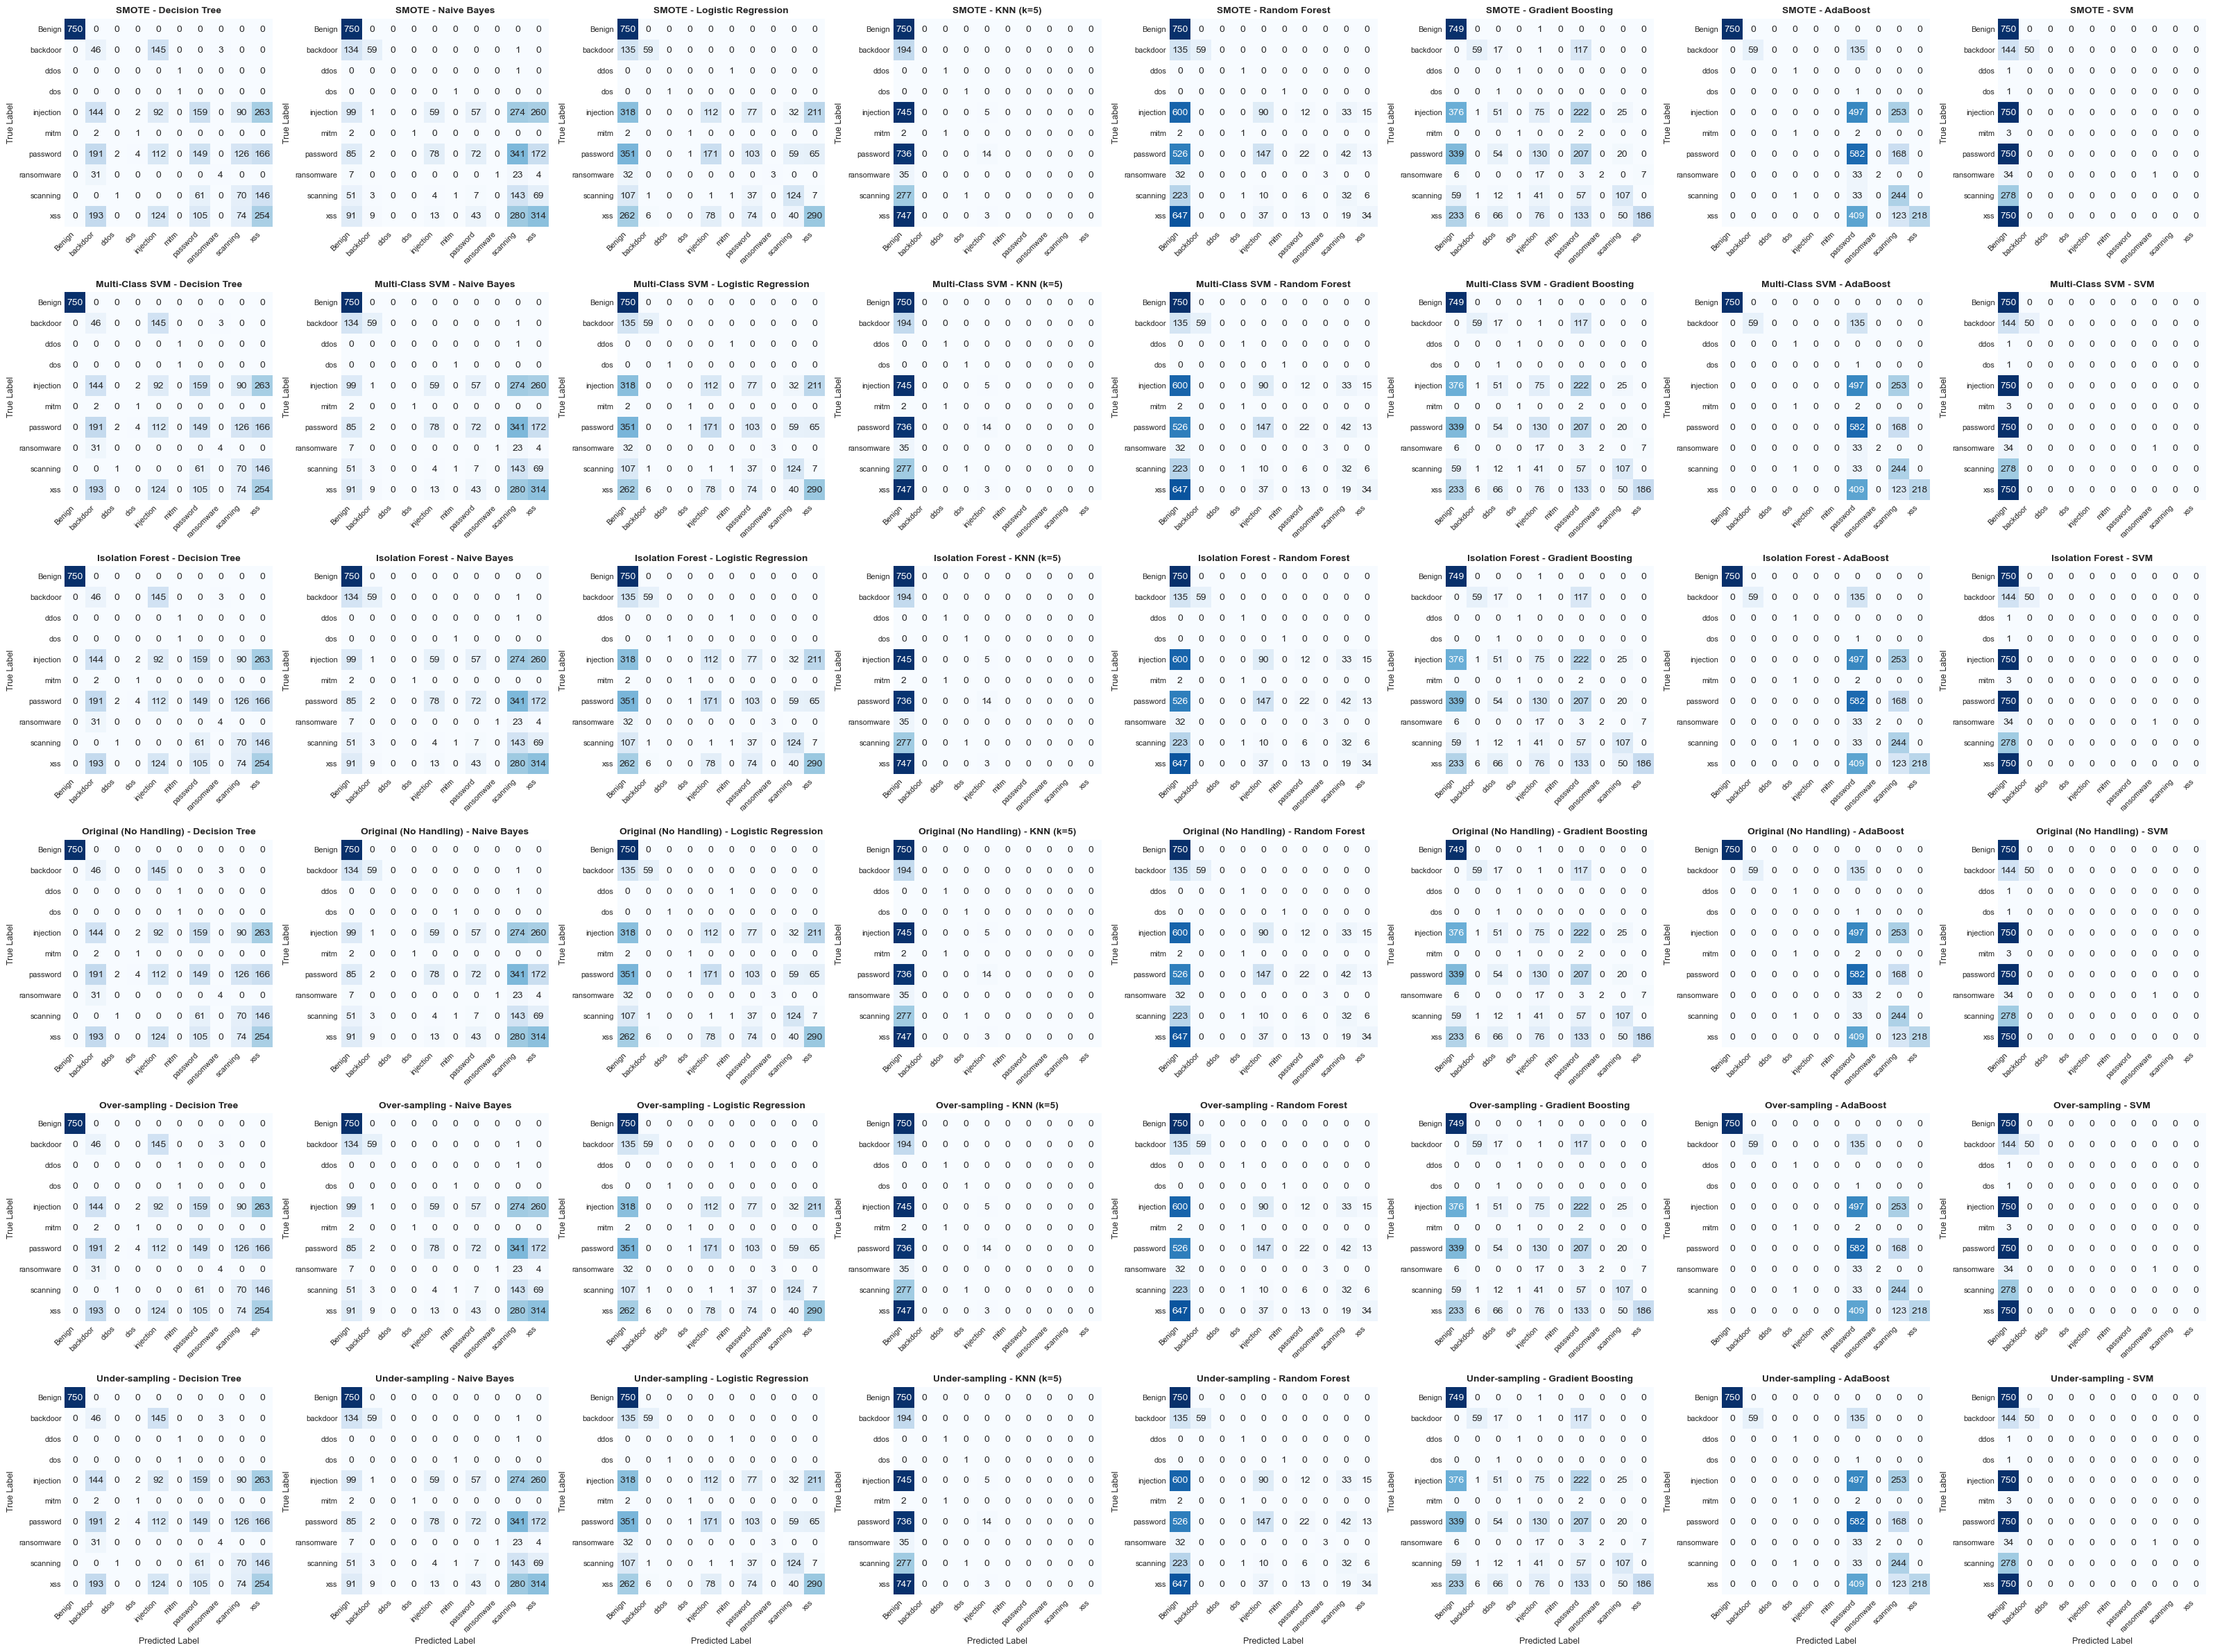

✓ Confusion matrix visualization saved as '03_multiclass_confusion_matrices.png'


In [114]:
# Create confusion matrix visualizations for selected models
selected_methods = list(evaluation_results.keys())
selected_classifiers = classifiers.keys()

fig, axes = plt.subplots(len(selected_methods),
                         len(selected_classifiers),
                         figsize=(len(selected_classifiers)*4, len(selected_methods)*4))

for i, method_name in enumerate(selected_methods):
    for j, clf_name in enumerate(selected_classifiers):
        ax = axes[i, j]

        try:
            cm = evaluation_results[method_name][clf_name]['confusion_matrix']
            if cm.shape[0] != len(le_target.classes_):
                padded_cm = np.zeros((len(le_target.classes_), len(le_target.classes_)), dtype=int)
                padded_cm[:cm.shape[0], :cm.shape[1]] = cm
                cm = padded_cm
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                       cbar=False, square=True,
                       xticklabels=le_target.classes_,
                       yticklabels=le_target.classes_)

            ax.set_title(f'{method_name} - {clf_name}', fontsize=10, fontweight='bold')
            ax.set_ylabel('True Label', fontsize=9)
            if i == len(selected_methods) - 1:
                ax.set_xlabel('Predicted Label', fontsize=9)

            # Rotate labels
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)
        except Exception as e:
            ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center',
                   transform=ax.transAxes)
            ax.set_title(f'{method_name} - {clf_name}', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('03_multiclass_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrix visualization saved as '03_multiclass_confusion_matrices.png'")


## Per-Class Performance Analysis

In [92]:
print("Keys in evaluation_results:", evaluation_results.keys())
for method in evaluation_results:
    print(f"  → {method}: {list(evaluation_results[method].keys())}")


Keys in evaluation_results: dict_keys(['SMOTE', 'Multi-Class SVM', 'Isolation Forest', 'Original (No Handling)', 'Over-sampling', 'Under-sampling'])
  → SMOTE: ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN (k=5)', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM']
  → Multi-Class SVM: ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN (k=5)', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM']
  → Isolation Forest: ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN (k=5)', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM']
  → Original (No Handling): ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN (k=5)', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM']
  → Over-sampling: ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN (k=5)', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVM']
  → Under-sampling: ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN (k=5)', 'Random Forest', 'Gradient Boos

In [93]:
# Create detailed per-class metrics
per_class_data = []

for method_name, method_results in evaluation_results.items():
    for clf_name, clf_results in method_results.items():
        per_class_metrics = clf_results['per_class_metrics']

        # classification_report keys are numeric (0,1,2...) or strings ('0','1',...)
        for class_idx, class_label in enumerate(le_target.classes_):
            key = str(class_idx)  # convert to string to match the classification_report dict keys

            if key in per_class_metrics:
                metrics = per_class_metrics[key]
                per_class_data.append({
                    'Method': method_name,
                    'Classifier': clf_name,
                    'Attack_Type': class_label,
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'],
                    'F1-Score': metrics['f1-score'],
                    'Support': int(metrics['support'])
                })

per_class_df = pd.DataFrame(per_class_data)
per_class_df.to_csv('per_class_metrics.csv', index=False)

print("\nPer-class metrics sample:")
print(per_class_df[per_class_df['Method'] == 'SMOTE'].head(10).to_string(index=False))



Per-class metrics sample:
Method    Classifier Attack_Type  Precision   Recall  F1-Score  Support
 SMOTE Decision Tree      Benign   1.000000 1.000000  1.000000      750
 SMOTE Decision Tree    backdoor   0.075783 0.237113  0.114856      194
 SMOTE Decision Tree        ddos   0.000000 0.000000  0.000000        1
 SMOTE Decision Tree         dos   0.000000 0.000000  0.000000        1
 SMOTE Decision Tree   injection   0.194503 0.122667  0.150450      750
 SMOTE Decision Tree        mitm   0.000000 0.000000  0.000000        3
 SMOTE Decision Tree    password   0.314346 0.198667  0.243464      750
 SMOTE Decision Tree  ransomware   0.571429 0.114286  0.190476       35
 SMOTE Decision Tree    scanning   0.194444 0.251799  0.219436      278
 SMOTE Decision Tree         xss   0.306393 0.338667  0.321723      750


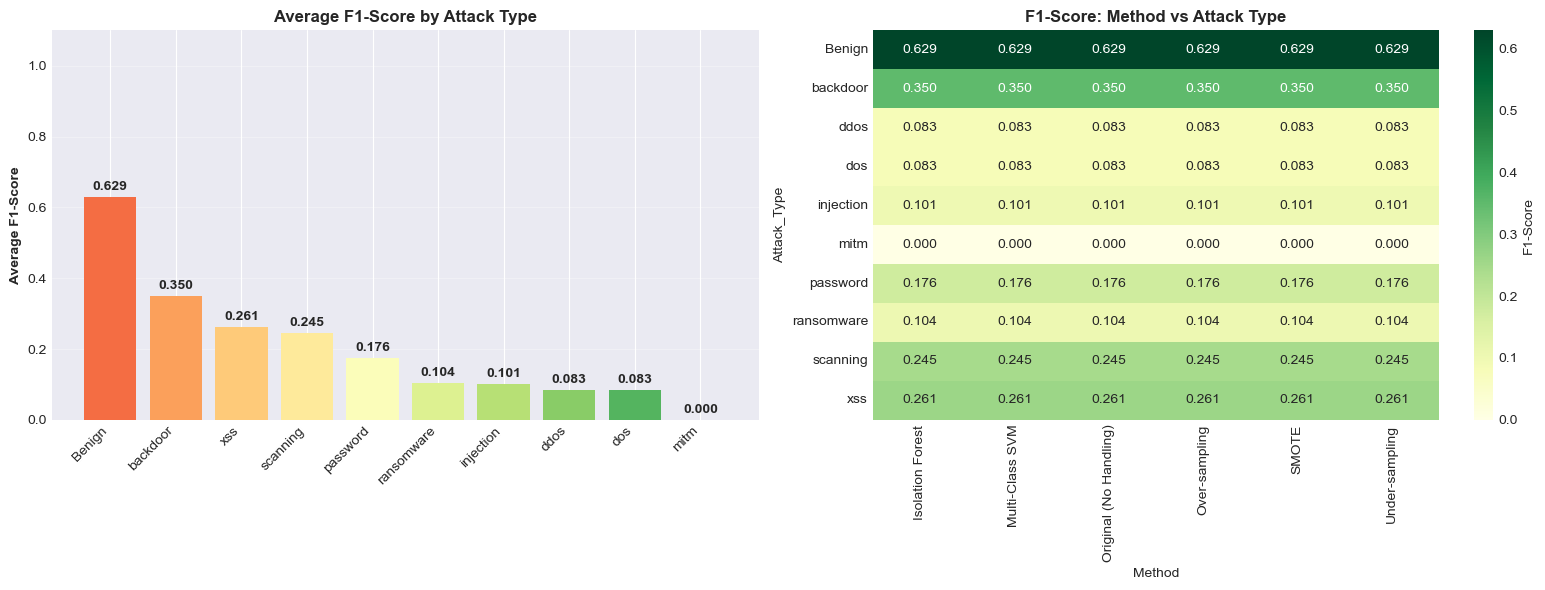


✓ Per-class performance visualization saved as '04_per_class_performance.png'


In [97]:
# Visualization: F1-Score by Attack Type
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Average F1 by attack type
attack_f1 = per_class_df.groupby('Attack_Type')['F1-Score'].mean().sort_values(ascending=False)
colors_attack = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(attack_f1)))

axes[0].bar(range(len(attack_f1)), attack_f1.values, color=colors_attack)
axes[0].set_xticks(range(len(attack_f1)))
axes[0].set_xticklabels(attack_f1.index, rotation=45, ha='right')
axes[0].set_ylabel('Average F1-Score', fontweight='bold')
axes[0].set_title('Average F1-Score by Attack Type', fontweight='bold', fontsize=12)
axes[0].set_ylim([0, 1.1])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(attack_f1.values):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# Plot 2: F1-Score heatmap by method and attack type
pivot_f1 = per_class_df.pivot_table(
    values='F1-Score', index='Attack_Type', columns='Method', aggfunc='mean'
)
sns.heatmap(pivot_f1, annot=True, fmt='.3f', cmap='YlGn', ax=axes[1],
           cbar_kws={'label': 'F1-Score'})
axes[1].set_title('F1-Score: Method vs Attack Type', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('04_per_class_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Per-class performance visualization saved as '04_per_class_performance.png'")


##  Overall Performance Comparison

In [98]:
# Create comparison dataframe
comparison_data = []

for method_name in evaluation_results.keys():
    for clf_name in evaluation_results[method_name].keys():
        metrics = evaluation_results[method_name][clf_name]['metrics']
        comparison_data.append({
            'Method': method_name,
            'Classifier': clf_name,
            'Accuracy': metrics['Accuracy'],
            'Weighted_Precision': metrics['Weighted Precision'],
            'Weighted_Recall': metrics['Weighted Recall'],
            'Weighted_F1': metrics['Weighted F1'],
            'Macro_Precision': metrics['Macro Precision'],
            'Macro_Recall': metrics['Macro Recall'],
            'Macro_F1': metrics['Macro F1'],
            'Micro_F1': metrics['Micro F1'],
            'AUC_OvR': metrics['AUC_OvR']
        })

comparison_df = pd.DataFrame(comparison_data)

print("\nTop 10 Best Performing Models (by Weighted F1-Score):")
top10 = comparison_df.nlargest(10, 'Weighted_F1')[
    ['Method', 'Classifier', 'Accuracy', 'Weighted_F1', 'Macro_F1', 'AUC_OvR']
]
print(top10.to_string(index=False))

print("\n" + "="*80)
print("BEST PERFORMING MODEL")
print("="*80)
best_idx = comparison_df['Weighted_F1'].idxmax()
best_row = comparison_df.loc[best_idx]
print(f"\nMethod: {best_row['Method']}")
print(f"Classifier: {best_row['Classifier']}")
print(f"Accuracy: {best_row['Accuracy']:.4f}")
print(f"Weighted F1: {best_row['Weighted_F1']:.4f}")
print(f"Macro F1: {best_row['Macro_F1']:.4f}")
print(f"AUC (OvR): {best_row['AUC_OvR']:.4f}")

# Export comprehensive results
comparison_df.to_csv('multiclass_metrics_comparison.csv', index=False)
print("\n✓ Metrics comparison exported to 'multiclass_metrics_comparison.csv'")


Top 10 Best Performing Models (by Weighted F1-Score):
                Method    Classifier  Accuracy  Weighted_F1  Macro_F1  AUC_OvR
                 SMOTE      AdaBoost  0.528189     0.474611  0.295937 0.712822
       Multi-Class SVM      AdaBoost  0.528189     0.474611  0.295937 0.712822
      Isolation Forest      AdaBoost  0.528189     0.474611  0.295937 0.712822
Original (No Handling)      AdaBoost  0.528189     0.474611  0.295937 0.712822
         Over-sampling      AdaBoost  0.528189     0.474611  0.295937 0.712822
        Under-sampling      AdaBoost  0.528189     0.474611  0.295937 0.712822
                 SMOTE Decision Tree  0.388667     0.391993  0.224040 0.576819
       Multi-Class SVM Decision Tree  0.388667     0.391993  0.224040 0.576819
      Isolation Forest Decision Tree  0.388667     0.391993  0.224040 0.576819
Original (No Handling) Decision Tree  0.388667     0.391993  0.224040 0.576819

BEST PERFORMING MODEL

Method: SMOTE
Classifier: AdaBoost
Accuracy: 0.5282


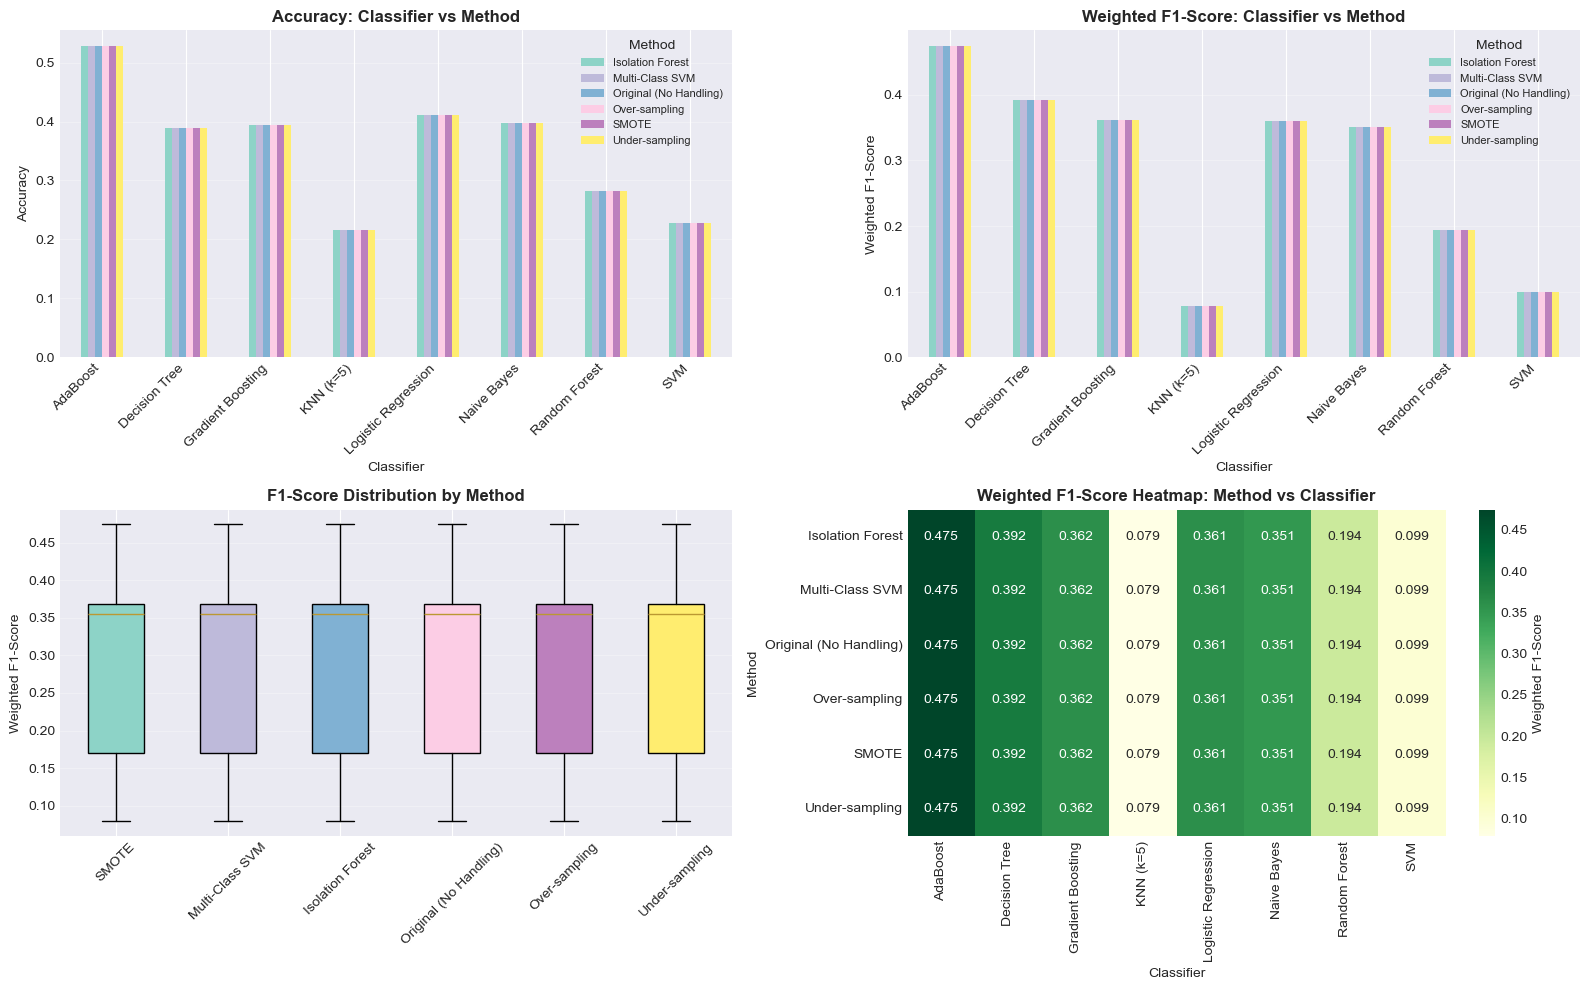


✓ Performance comparison visualization saved as '05_overall_performance_comparison.png'


In [99]:
# Visualization: Performance comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Accuracy by method and classifier
comparison_pivot_acc = comparison_df.pivot_table(
    values='Accuracy', index='Classifier', columns='Method', aggfunc='mean'
)
comparison_pivot_acc.plot(kind='bar', ax=axes[0, 0], color=plt.cm.Set3(np.linspace(0, 1, len(comparison_pivot_acc.columns))))
axes[0, 0].set_title('Accuracy: Classifier vs Method', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
axes[0, 0].legend(title='Method', fontsize=8)
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Weighted F1 comparison
comparison_pivot_f1 = comparison_df.pivot_table(
    values='Weighted_F1', index='Classifier', columns='Method', aggfunc='mean'
)
comparison_pivot_f1.plot(kind='bar', ax=axes[0, 1], color=plt.cm.Set3(np.linspace(0, 1, len(comparison_pivot_f1.columns))))
axes[0, 1].set_title('Weighted F1-Score: Classifier vs Method', fontweight='bold')
axes[0, 1].set_ylabel('Weighted F1-Score')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].legend(title='Method', fontsize=8)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Method performance summary (boxplot)
method_f1_scores = [comparison_df[comparison_df['Method'] == m]['Weighted_F1'].values
                    for m in comparison_df['Method'].unique()]
bp = axes[1, 0].boxplot(method_f1_scores, labels=comparison_df['Method'].unique(), patch_artist=True)
for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))):
    patch.set_facecolor(color)
axes[1, 0].set_ylabel('Weighted F1-Score')
axes[1, 0].set_title('F1-Score Distribution by Method', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: Heatmap of average performance
heatmap_data = comparison_df.pivot_table(
    values='Weighted_F1', index='Method', columns='Classifier', aggfunc='mean'
)
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='YlGn', ax=axes[1, 1],
           cbar_kws={'label': 'Weighted F1-Score'})
axes[1, 1].set_title('Weighted F1-Score Heatmap: Method vs Classifier', fontweight='bold')

plt.tight_layout()
plt.savefig('05_overall_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Performance comparison visualization saved as '05_overall_performance_comparison.png'")


## Attack-Type Specific Analysis

In [104]:
attack_type_analysis = []

for method_name in list(evaluation_results.keys()):  # First 3 methods
    for clf_name in list(evaluation_results[method_name].keys()):  # First 3 classifiers
        try:
            y_pred = evaluation_results[method_name][clf_name]['predictions']
            cm = evaluation_results[method_name][clf_name]['confusion_matrix']

            # Sanity check
            if not isinstance(cm, np.ndarray):
                print(f"⚠ Confusion matrix for {method_name} - {clf_name} is not a numpy array.")
                continue

            for attack_idx, attack_name in enumerate(le_target.classes_):
                # ✅ Corrected condition
                if attack_idx < cm.shape[0]:
                    tp = cm[attack_idx, attack_idx]
                    fp = cm[:, attack_idx].sum() - tp
                    fn = cm[attack_idx, :].sum() - tp
                    tn = cm.sum() - tp - fp - fn

                    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
                    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
                    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
                    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
                    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

                    attack_type_analysis.append({
                        'Method': method_name,
                        'Classifier': clf_name,
                        'Attack_Type': attack_name,
                        'TP': tp,
                        'FP': fp,
                        'FN': fn,
                        'TN': tn,
                        'TPR': tpr,
                        'FPR': fpr,
                        'Precision': precision,
                        'Recall': recall,
                        'F1-Score': f1
                    })
        except Exception as e:
            print(f"Error processing {method_name} - {clf_name}: {str(e)}")

attack_analysis_df = pd.DataFrame(attack_type_analysis)
attack_analysis_df.to_csv('attack_type_specific_analysis.csv', index=False)

print("Columns in attack_analysis_df:", attack_analysis_df.columns.tolist())
print("Shape:", attack_analysis_df.shape)
print(attack_analysis_df.head())


Columns in attack_analysis_df: ['Method', 'Classifier', 'Attack_Type', 'TP', 'FP', 'FN', 'TN', 'TPR', 'FPR', 'Precision', 'Recall', 'F1-Score']
Shape: (480, 12)
  Method     Classifier Attack_Type   TP   FP   FN    TN       TPR       FPR  \
0  SMOTE  Decision Tree      Benign  750    0    0  2762  1.000000  0.000000   
1  SMOTE  Decision Tree    backdoor   46  561  148  2757  0.237113  0.169078   
2  SMOTE  Decision Tree        ddos    0    3    1  3508  0.000000  0.000854   
3  SMOTE  Decision Tree         dos    0    7    1  3504  0.000000  0.001994   
4  SMOTE  Decision Tree   injection   92  381  658  2381  0.122667  0.137944   

   Precision    Recall  F1-Score  
0   1.000000  1.000000  1.000000  
1   0.075783  0.237113  0.114856  
2   0.000000  0.000000  0.000000  
3   0.000000  0.000000  0.000000  
4   0.194503  0.122667  0.150450  


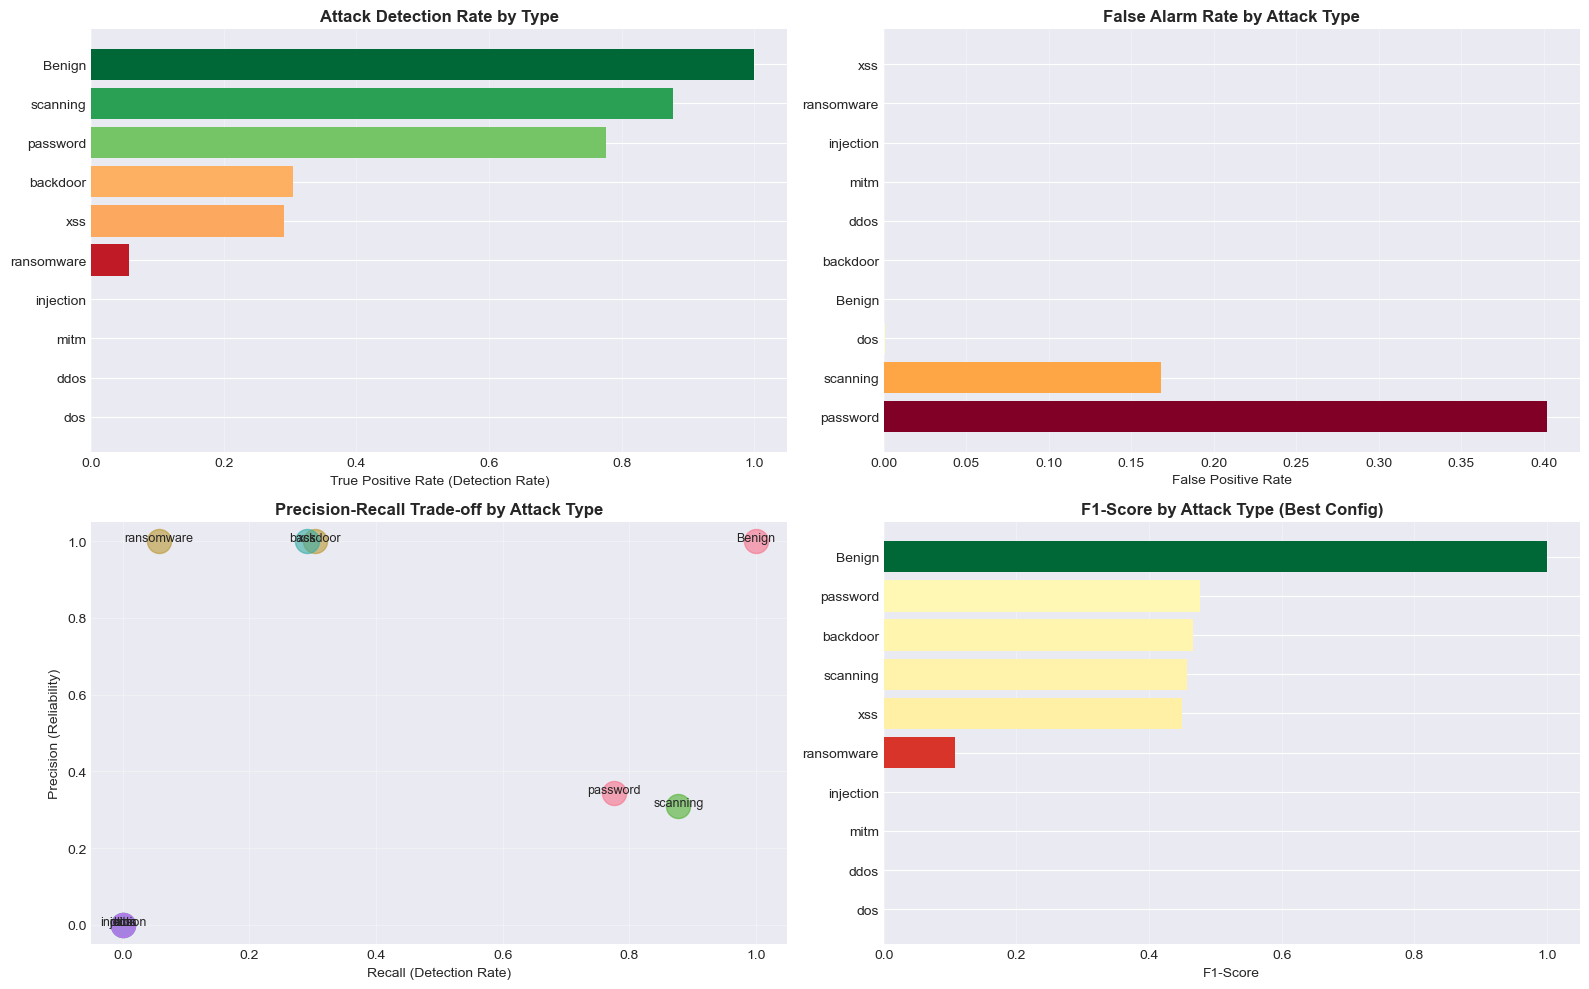


✓ Attack-type analysis visualization saved as '06_attack_type_specific_analysis.png'


In [105]:
# Visualization: Attack-type specific performance
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Detection rate (TPR) by attack type
attack_tpr = attack_analysis_df[
    (attack_analysis_df['Method'] == best_method) &
    (attack_analysis_df['Classifier'] == best_clf)
].sort_values('TPR', ascending=True)

colors_tpr = plt.cm.RdYlGn(attack_tpr['TPR'].values / attack_tpr['TPR'].max())
axes[0, 0].barh(range(len(attack_tpr)), attack_tpr['TPR'].values, color=colors_tpr)
axes[0, 0].set_yticks(range(len(attack_tpr)))
axes[0, 0].set_yticklabels(attack_tpr['Attack_Type'].values)
axes[0, 0].set_xlabel('True Positive Rate (Detection Rate)')
axes[0, 0].set_title('Attack Detection Rate by Type', fontweight='bold')
axes[0, 0].set_xlim([0, 1.05])
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: False Positive Rate by attack type
attack_fpr = attack_analysis_df[
    (attack_analysis_df['Method'] == best_method) &
    (attack_analysis_df['Classifier'] == best_clf)
].sort_values('FPR', ascending=False)

colors_fpr = plt.cm.YlOrRd(attack_fpr['FPR'].values / attack_fpr['FPR'].max()) if attack_fpr['FPR'].max() > 0 else 'red'
axes[0, 1].barh(range(len(attack_fpr)), attack_fpr['FPR'].values, color=colors_fpr)
axes[0, 1].set_yticks(range(len(attack_fpr)))
axes[0, 1].set_yticklabels(attack_fpr['Attack_Type'].values)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_title('False Alarm Rate by Attack Type', fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Plot 3: Precision vs Recall scatter
attack_scatter = attack_analysis_df[
    (attack_analysis_df['Method'] == best_method) &
    (attack_analysis_df['Classifier'] == best_clf)
]

for _, row in attack_scatter.iterrows():
    axes[1, 0].scatter(row['Recall'], row['Precision'], s=300, alpha=0.6)
    axes[1, 0].annotate(row['Attack_Type'],
                       (row['Recall'], row['Precision']),
                       fontsize=9, ha='center')

axes[1, 0].set_xlabel('Recall (Detection Rate)')
axes[1, 0].set_ylabel('Precision (Reliability)')
axes[1, 0].set_title('Precision-Recall Trade-off by Attack Type', fontweight='bold')
axes[1, 0].set_xlim([-0.05, 1.05])
axes[1, 0].set_ylim([-0.05, 1.05])
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: F1-Score by attack type (best configuration)
attack_f1_sorted = attack_scatter.sort_values('F1-Score', ascending=True)
colors_f1 = plt.cm.RdYlGn(attack_f1_sorted['F1-Score'].values)
axes[1, 1].barh(range(len(attack_f1_sorted)), attack_f1_sorted['F1-Score'].values, color=colors_f1)
axes[1, 1].set_yticks(range(len(attack_f1_sorted)))
axes[1, 1].set_yticklabels(attack_f1_sorted['Attack_Type'].values)
axes[1, 1].set_xlabel('F1-Score')
axes[1, 1].set_title('F1-Score by Attack Type (Best Config)', fontweight='bold')
axes[1, 1].set_xlim([0, 1.05])
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('06_attack_type_specific_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Attack-type analysis visualization saved as '06_attack_type_specific_analysis.png'")


##  Overfitting and Underfitting Analysis

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

overfitting_analysis = []

for method_name in list(handled_datasets.keys())[:3]:
    X_method, y_method = handled_datasets[method_name]
    print(f"\n{method_name}:")
    print("─" * 60)

    for clf_name in classifiers.keys():
        clf = trained_models[method_name][clf_name] 

        # Cross-validation (optional – only for statistical check)
        cv_scores = cross_val_score(clf, X_method, y_method, cv=5,
                                   scoring='f1_weighted', n_jobs=-1)

        # Training and test predictions
        train_pred = clf.predict(X_method)
        test_pred = clf.predict(X_test)

        # Accuracies
        train_accuracy = accuracy_score(y_method, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)

        # Gap analysis
        gap = train_accuracy - test_accuracy
        status = "⚠ OVERFITTING" if gap > 0.1 else ("✓ BALANCED" if gap > -0.05 else "⚠ UNDERFITTING")

        overfitting_analysis.append({
            'Method': method_name,
            'Classifier': clf_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std(),
            'Gap (Train-Test)': gap,
            'Status': status
        })

        print(f"\n  {clf_name}:")
        print(f"    Train Accuracy: {train_accuracy:.4f}")
        print(f"    Test Accuracy:  {test_accuracy:.4f}")
        print(f"    CV Mean:        {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        print(f"    Gap:            {gap:.4f} {status}")

overfitting_df = pd.DataFrame(overfitting_analysis)
overfitting_df.to_csv('multiclass_overfitting_analysis.csv', index=False)
print("\n✓ Overfitting analysis exported to 'multiclass_overfitting_analysis.csv'")


Under-sampling:
────────────────────────────────────────────────────────────

  Decision Tree:
    Train Accuracy: 0.9989
    Test Accuracy:  0.7392
    CV Mean:        0.9919 ± 0.0019
    Gap:            0.2597 ⚠ OVERFITTING

  Naive Bayes:
    Train Accuracy: 1.0000
    Test Accuracy:  0.3981
    CV Mean:        0.9895 ± 0.0017
    Gap:            0.6019 ⚠ OVERFITTING

  Logistic Regression:
    Train Accuracy: 0.9994
    Test Accuracy:  0.4103
    CV Mean:        0.9901 ± 0.0031
    Gap:            0.5891 ⚠ OVERFITTING

  KNN (k=5):
    Train Accuracy: 0.9910
    Test Accuracy:  0.2155
    CV Mean:        0.9862 ± 0.0027
    Gap:            0.7754 ⚠ OVERFITTING

  Random Forest:
    Train Accuracy: 1.0000
    Test Accuracy:  0.7563
    CV Mean:        0.9879 ± 0.0039
    Gap:            0.2437 ⚠ OVERFITTING

  Gradient Boosting:
    Train Accuracy: 1.0000
    Test Accuracy:  0.3944
    CV Mean:        0.9900 ± 0.0024
    Gap:            0.6056 ⚠ OVERFITTING

  AdaBoost:
    Train A

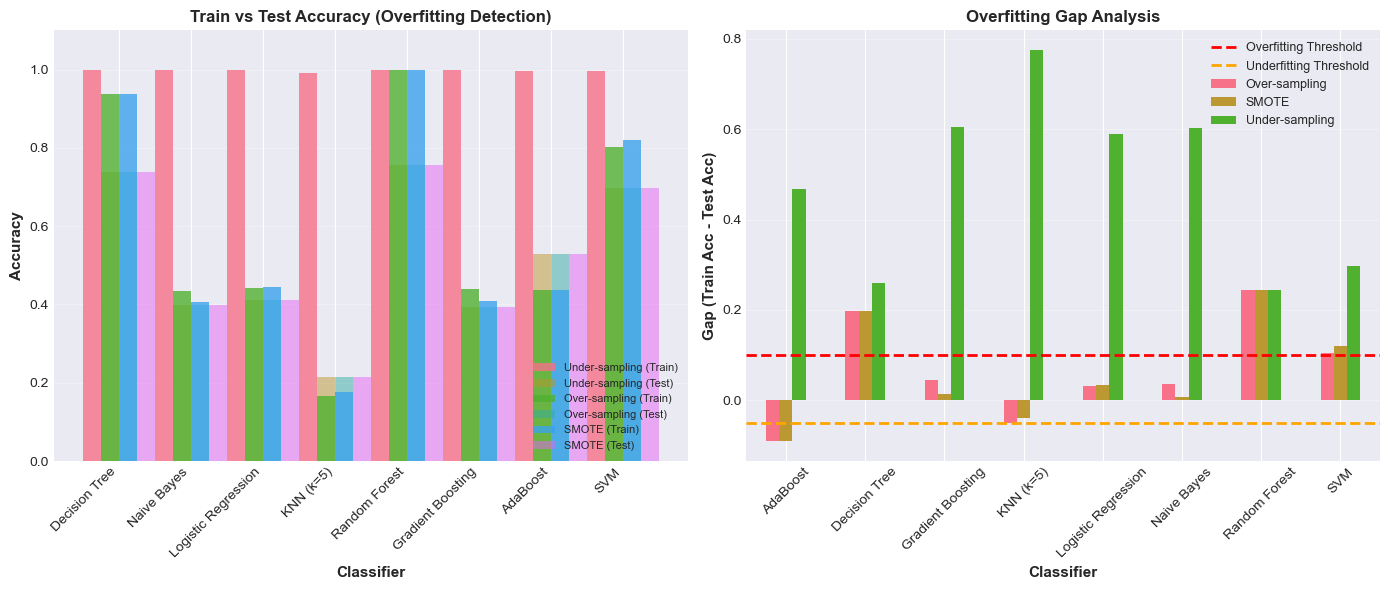

✓ Overfitting analysis visualization saved as '07_overfitting_analysis_multiclass.png'


In [123]:
# Visualize overfitting analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Train vs Test Accuracy
methods = overfitting_df['Method'].unique()
classifiers_ovf = overfitting_df['Classifier'].unique()

x = np.arange(len(classifiers_ovf))
width = 0.25

for idx, method in enumerate(methods):
    subset = overfitting_df[overfitting_df['Method'] == method]

    train_acc = []
    test_acc = []
    for clf in classifiers_ovf:
        clf_data = subset[subset['Classifier'] == clf]
        if not clf_data.empty:
            train_acc.append(clf_data['Train Accuracy'].values[0])
            test_acc.append(clf_data['Test Accuracy'].values[0])
        else:
            train_acc.append(0)
            test_acc.append(0)

    ax1.bar(x + idx*width - width, train_acc, width, label=f'{method} (Train)', alpha=0.8)
    ax1.bar(x + idx*width, test_acc, width, label=f'{method} (Test)', alpha=0.5)

ax1.set_xlabel('Classifier', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
ax1.set_title('Train vs Test Accuracy (Overfitting Detection)',
              fontsize=12, fontweight='bold')
ax1.set_xticks(x + width * 0.5)
ax1.set_xticklabels(classifiers_ovf, rotation=45, ha='right')
ax1.legend(fontsize=8, loc='lower right')
ax1.set_ylim([0, 1.1])
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Gap visualization
gap_pivot = overfitting_df.pivot_table(
    values='Gap (Train-Test)', index='Classifier', columns='Method', aggfunc='mean'
)

gap_pivot.plot(kind='bar', ax=ax2)
ax2.axhline(y=0.1, color='red', linestyle='--', linewidth=2, label='Overfitting Threshold')
ax2.axhline(y=-0.05, color='orange', linestyle='--', linewidth=2, label='Underfitting Threshold')
ax2.set_xlabel('Classifier', fontsize=11, fontweight='bold')
ax2.set_ylabel('Gap (Train Acc - Test Acc)', fontsize=11, fontweight='bold')
ax2.set_title('Overfitting Gap Analysis', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(axis='y', alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('07_overfitting_analysis_multiclass.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Overfitting analysis visualization saved as '07_overfitting_analysis_multiclass.png'")

## Robustness and Statistical Analysis

In [124]:
from scipy import stats

# 1. Cross-validation robustness
print("\n Cross-Validation Robustness Test")
print("─" * 60)

robustness_results = []

for method_name in list(handled_datasets.keys()):
    X_method, y_method = handled_datasets[method_name]

    for clf_name in classifiers.keys():
        clf = classifiers[clf_name]

        # 5-Fold Cross-validation (Weighted F1)
        scores = cross_val_score(clf, X_method, y_method, cv=5,
                                scoring='f1_weighted', n_jobs=-1)

        robustness_results.append({
            'Method': method_name,
            'Classifier': clf_name,
            'Mean CV F1': scores.mean(),
            'Std CV F1': scores.std(),
            'Min CV F1': scores.min(),
            'Max CV F1': scores.max(),
            'Coefficient of Variation': (scores.std() / scores.mean()) if scores.mean() != 0 else 0
        })

        print(f"\n{method_name} - {clf_name}:")
        print(f"  CV Scores: {[f'{s:.4f}' for s in scores]}")
        print(f"  Mean: {scores.mean():.4f}, Std: {scores.std():.4f}")
        print(f"  CoV: {(scores.std() / scores.mean()):.4f}" if scores.mean() != 0 else "  CoV: N/A")

robustness_df = pd.DataFrame(robustness_results)
robustness_df.to_csv('multiclass_robustness_analysis.csv', index=False)
print("\n✓ Robustness analysis exported to 'multiclass_robustness_analysis.csv'")



 Cross-Validation Robustness Test
────────────────────────────────────────────────────────────

Under-sampling - Decision Tree:
  CV Scores: ['0.9887', '0.9915', '0.9915', '0.9943', '0.9934']
  Mean: 0.9919, Std: 0.0019
  CoV: 0.0019

Under-sampling - Naive Bayes:
  CV Scores: ['0.9887', '0.9873', '0.9887', '0.9915', '0.9915']
  Mean: 0.9895, Std: 0.0017
  CoV: 0.0017

Under-sampling - Logistic Regression:
  CV Scores: ['0.9887', '0.9859', '0.9887', '0.9943', '0.9929']
  Mean: 0.9901, Std: 0.0031
  CoV: 0.0031

Under-sampling - KNN (k=5):
  CV Scores: ['0.9845', '0.9831', '0.9845', '0.9887', '0.9901']
  Mean: 0.9862, Std: 0.0027
  CoV: 0.0028

Under-sampling - Random Forest:
  CV Scores: ['0.9845', '0.9831', '0.9887', '0.9943', '0.9887']
  Mean: 0.9879, Std: 0.0039
  CoV: 0.0040

Under-sampling - Gradient Boosting:
  CV Scores: ['0.9864', '0.9901', '0.9887', '0.9934', '0.9915']
  Mean: 0.9900, Std: 0.0024
  CoV: 0.0024

Under-sampling - AdaBoost:
  CV Scores: ['0.9906', '0.9887', '0.9

In [125]:
# 2. Statistical comparison of methods (ANOVA)
print("\n\n Statistical Comparison (ANOVA Test)")
print("─" * 60)

method_groups = {}
for method in comparison_df['Method'].unique():
    method_groups[method] = comparison_df[comparison_df['Method'] == method]['Weighted_F1'].values

f_stat, p_value = stats.f_oneway(*method_groups.values())
print(f"\nANOVA Test Results (Weighted F1-Score):")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  P-value: {p_value:.6f}")
print(f"  Conclusion: {'Significant difference between methods (p<0.05)' if p_value < 0.05 else 'No significant difference (p>=0.05)'}")



 Statistical Comparison (ANOVA Test)
────────────────────────────────────────────────────────────

ANOVA Test Results (Weighted F1-Score):
  F-statistic: -0.0000
  P-value: nan
  Conclusion: No significant difference (p>=0.05)


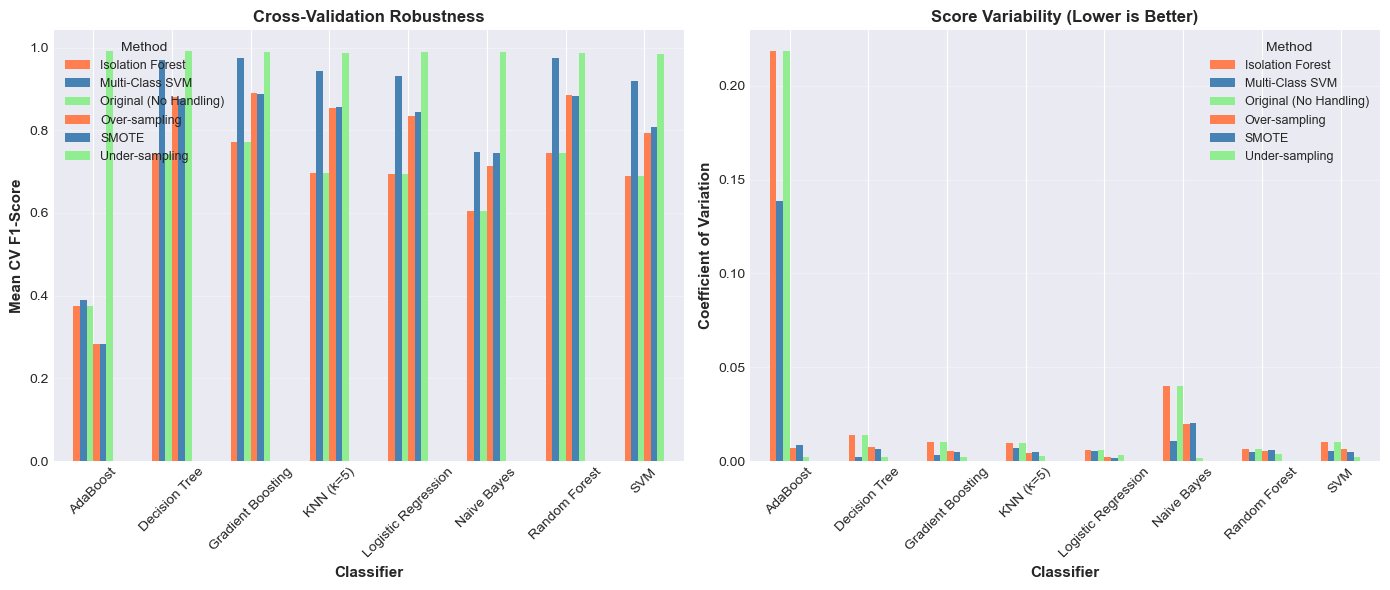

✓ Robustness visualization saved as '08_robustness_analysis_multiclass.png'


In [126]:
# Visualization of robustness
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Mean CV F1 ---
robustness_pivot = robustness_df.pivot_table(
    values='Mean CV F1', index='Classifier', columns='Method', aggfunc='mean'
)
robustness_pivot.plot(
    kind='bar', ax=axes[0],
    color=['coral', 'steelblue', 'lightgreen'][:len(robustness_pivot.columns)]
)
axes[0].set_xlabel('Classifier', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Mean CV F1-Score', fontsize=11, fontweight='bold')
axes[0].set_title('Cross-Validation Robustness', fontsize=12, fontweight='bold')
axes[0].legend(title='Method', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# --- Plot 2: Coefficient of Variation ---
cov_pivot = robustness_df.pivot_table(
    values='Coefficient of Variation', index='Classifier', columns='Method', aggfunc='mean'
)
cov_pivot.plot(
    kind='bar', ax=axes[1],
    color=['coral', 'steelblue', 'lightgreen'][:len(cov_pivot.columns)]
)
axes[1].set_xlabel('Classifier', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Coefficient of Variation', fontsize=11, fontweight='bold')
axes[1].set_title('Score Variability (Lower is Better)', fontsize=12, fontweight='bold')
axes[1].legend(title='Method', fontsize=9)
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('08_robustness_analysis_multiclass.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Robustness visualization saved as '08_robustness_analysis_multiclass.png'")


## Final Summary

In [127]:
# Generate comprehensive summary statistics
summary_stats = comparison_df.groupby('Method')[
    ['Accuracy', 'Weighted_Precision', 'Weighted_Recall', 'Weighted_F1', 'AUC_OvR']
].agg(['mean', 'std', 'min', 'max'])

print("\n╔═════════════════════════════════════════════════════════════════════════════╗")
print("║           OVERALL PERFORMANCE BY IMBALANCE HANDLING METHOD                  ║")
print("╚═════════════════════════════════════════════════════════════════════════════╝\n")
print(summary_stats.to_string())


╔═════════════════════════════════════════════════════════════════════════════╗
║           OVERALL PERFORMANCE BY IMBALANCE HANDLING METHOD                  ║
╚═════════════════════════════════════════════════════════════════════════════╝

                        Accuracy                               Weighted_Precision                               Weighted_Recall                               Weighted_F1                                 AUC_OvR                              
                            mean       std       min       max               mean       std       min       max            mean       std       min       max        mean       std       min       max      mean       std       min       max
Method                                                                                                                                                                                                                                         
Isolation Forest        0.355638  0.10

In [128]:
# Best combinations
print("\n\n╔═════════════════════════════════════════════════════════════════════════════╗")
print("║                        TOP 10 BEST COMBINATIONS                             ║")
print("╚═════════════════════════════════════════════════════════════════════════════╝\n")

top10 = comparison_df.nlargest(10, 'Weighted_F1')[
    ['Method', 'Classifier', 'Accuracy', 'Weighted_Precision',
     'Weighted_Recall', 'Weighted_F1', 'AUC_OvR']
]
print(top10.to_string(index=False))



╔═════════════════════════════════════════════════════════════════════════════╗
║                        TOP 10 BEST COMBINATIONS                             ║
╚═════════════════════════════════════════════════════════════════════════════╝

                Method    Classifier  Accuracy  Weighted_Precision  Weighted_Recall  Weighted_F1  AUC_OvR
                 SMOTE      AdaBoost  0.528189            0.590279         0.528189     0.474611 0.712822
       Multi-Class SVM      AdaBoost  0.528189            0.590279         0.528189     0.474611 0.712822
      Isolation Forest      AdaBoost  0.528189            0.590279         0.528189     0.474611 0.712822
Original (No Handling)      AdaBoost  0.528189            0.590279         0.528189     0.474611 0.712822
         Over-sampling      AdaBoost  0.528189            0.590279         0.528189     0.474611 0.712822
        Under-sampling      AdaBoost  0.528189            0.590279         0.528189     0.474611 0.712822
               

In [130]:
# Key findings
print("\n\n╔═════════════════════════════════════════════════════════════════════════════╗")
print("║                            KEY FINDINGS                                     ║")
print("╚═════════════════════════════════════════════════════════════════════════════╝\n")

print("1. BEST IMBALANCE HANDLING METHOD:")
best_method = comparison_df.groupby('Method')['Weighted_F1'].mean().idxmax()
best_method_score = comparison_df.groupby('Method')['Weighted_F1'].mean().max()
print(f"   {best_method} (Avg Weighted F1: {best_method_score:.4f})")

print("\n2. BEST CLASSIFIER:")
best_clf = comparison_df.groupby('Classifier')['Weighted_F1'].mean().idxmax()
best_clf_score = comparison_df.groupby('Classifier')['Weighted_F1'].mean().max()
print(f"   {best_clf} (Avg Weighted F1: {best_clf_score:.4f})")

print("\n3. BEST OVERALL CONFIGURATION:")
best_idx = comparison_df['Weighted_F1'].idxmax()
best_config = comparison_df.loc[best_idx]
print(f"   Method: {best_config['Method']}")
print(f"   Classifier: {best_config['Classifier']}")
print(f"   Accuracy: {best_config['Accuracy']:.4f}")
print(f"   Weighted F1: {best_config['Weighted_F1']:.4f}")
print(f"   Macro F1: {best_config['Macro_F1']:.4f}")

print("\n4. OVERFITTING STATUS:")
overfitting_count = len(overfitting_df[overfitting_df['Gap (Train-Test)'] > 0.1])
balanced_count = len(overfitting_df[(overfitting_df['Gap (Train-Test)'] <= 0.1) &
                                    (overfitting_df['Gap (Train-Test)'] > -0.05)])
underfitting_count = len(overfitting_df[overfitting_df['Gap (Train-Test)'] <= -0.05])
print(f"   Overfitting: {overfitting_count} models")
print(f"   Balanced: {balanced_count} models")
print(f"   Underfitting: {underfitting_count} models")

print("\n5. ROBUSTNESS (Coefficient of Variation):")
best_robustness = robustness_df.nsmallest(1, 'Coefficient of Variation').iloc[0]
print(f"   Most Robust: {best_robustness['Method']} + {best_robustness['Classifier']}")
print(f"   CoV: {best_robustness['Coefficient of Variation']:.4f}")
print("\n6. ATTACK DETECTION PERFORMANCE (Best Configuration):")
best_attack_data = attack_analysis_df[
    (attack_analysis_df['Method'] == best_config['Method']) &
    (attack_analysis_df['Classifier'] == best_config['Classifier'])
].sort_values('F1-Score', ascending=False)

for idx, (_, row) in enumerate(best_attack_data.iterrows(), 1):
    print(f"   {idx}. {row['Attack_Type']:15s} - Recall: {row['Recall']:.3f}, Precision: {row['Precision']:.3f}, F1: {row['F1-Score']:.3f}")



╔═════════════════════════════════════════════════════════════════════════════╗
║                            KEY FINDINGS                                     ║
╚═════════════════════════════════════════════════════════════════════════════╝

1. BEST IMBALANCE HANDLING METHOD:
   Isolation Forest (Avg Weighted F1: 0.2890)

2. BEST CLASSIFIER:
   AdaBoost (Avg Weighted F1: 0.4746)

3. BEST OVERALL CONFIGURATION:
   Method: SMOTE
   Classifier: AdaBoost
   Accuracy: 0.5282
   Weighted F1: 0.4746
   Macro F1: 0.2959

4. OVERFITTING STATUS:
   Overfitting: 14 models
   Balanced: 7 models
   Underfitting: 3 models

5. ROBUSTNESS (Coefficient of Variation):
   Most Robust: SMOTE + Logistic Regression
   CoV: 0.0014

6. ATTACK DETECTION PERFORMANCE (Best Configuration):
   1. Benign          - Recall: 1.000, Precision: 1.000, F1: 1.000
   2. password        - Recall: 0.776, Precision: 0.344, F1: 0.477
   3. backdoor        - Recall: 0.304, Precision: 1.000, F1: 0.466
   4. scanning        - R

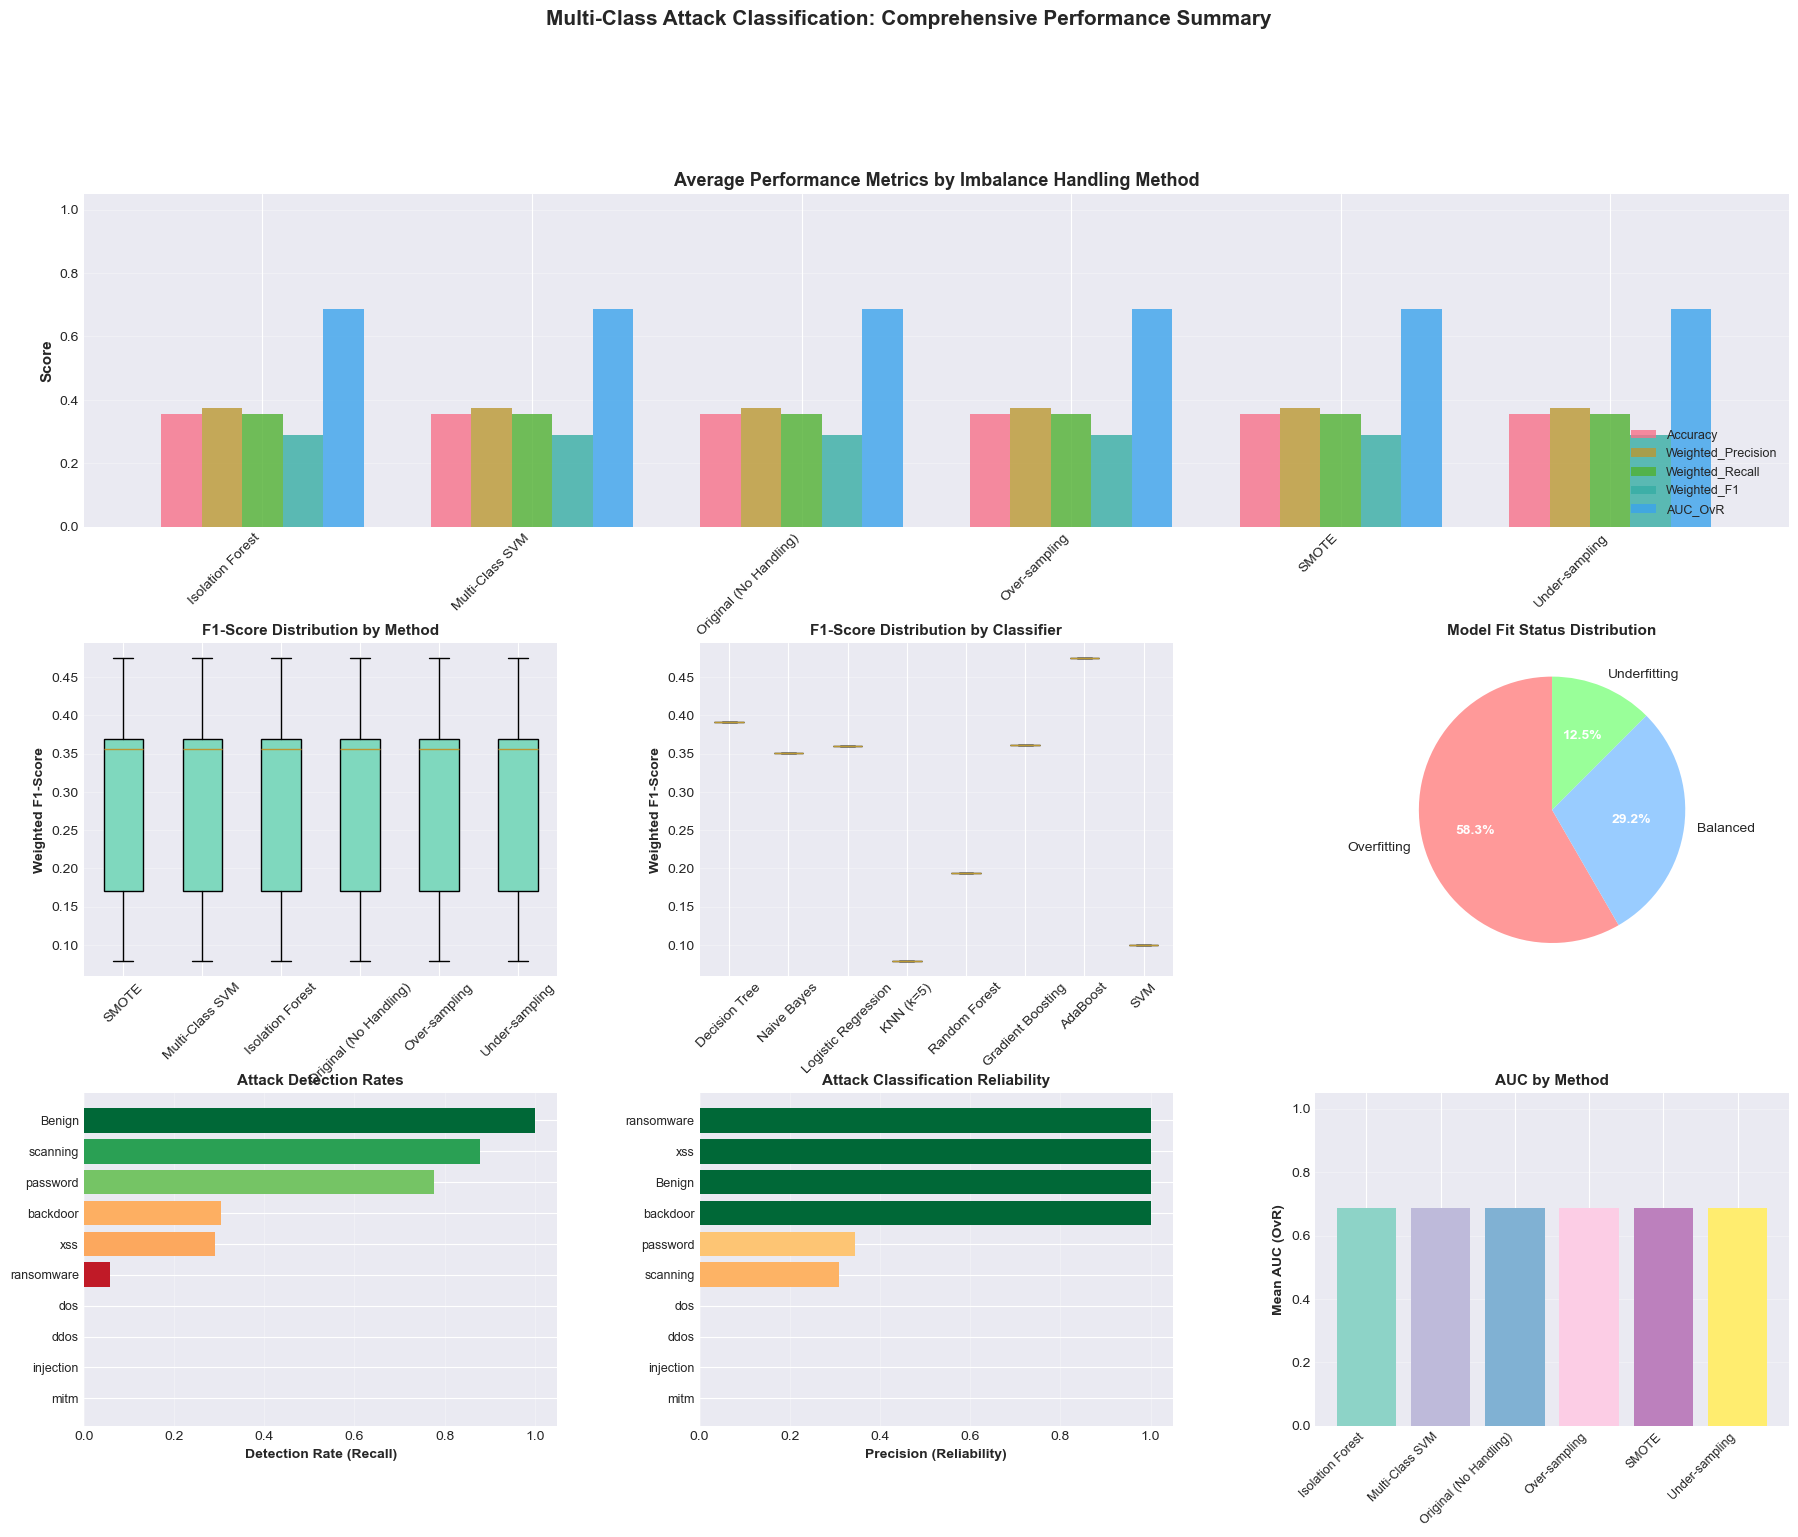


✓ Comprehensive summary visualization saved as '09_comprehensive_multiclass_summary.png'


In [132]:
# Create final summary visualization
fig = plt.figure(figsize=(22,16))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Best metrics by method
ax1 = fig.add_subplot(gs[0, :])
best_by_method = comparison_df.groupby('Method')[
    ['Accuracy', 'Weighted_Precision', 'Weighted_Recall', 'Weighted_F1', 'AUC_OvR']
].mean()

x_pos = np.arange(len(best_by_method.index))
width = 0.15

for idx, metric in enumerate(['Accuracy', 'Weighted_Precision', 'Weighted_Recall', 'Weighted_F1', 'AUC_OvR']):
    ax1.bar(x_pos + idx*width, best_by_method[metric], width, label=metric, alpha=0.8)

ax1.set_ylabel('Score', fontsize=11, fontweight='bold')
ax1.set_title('Average Performance Metrics by Imbalance Handling Method', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos + width * 2)
ax1.set_xticklabels(best_by_method.index, rotation=45, ha='right')
ax1.legend(fontsize=9, loc='lower right')
ax1.set_ylim([0, 1.05])
ax1.grid(axis='y', alpha=0.3)

# 2. Method comparison (boxplot)
ax2 = fig.add_subplot(gs[1, 0])
method_f1_scores = [comparison_df[comparison_df['Method'] == m]['Weighted_F1'].values
                    for m in comparison_df['Method'].unique()]
bp = ax2.boxplot(method_f1_scores, labels=comparison_df['Method'].unique(), patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#7fd8be')
ax2.set_ylabel('Weighted F1-Score', fontsize=10, fontweight='bold')
ax2.set_title('F1-Score Distribution by Method', fontsize=11, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Classifier comparison
ax3 = fig.add_subplot(gs[1, 1])
clf_f1_scores = [comparison_df[comparison_df['Classifier'] == c]['Weighted_F1'].values
                 for c in comparison_df['Classifier'].unique()]
bp = ax3.boxplot(clf_f1_scores, labels=comparison_df['Classifier'].unique(), patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('#f39c12')
ax3.set_ylabel('Weighted F1-Score', fontsize=10, fontweight='bold')
ax3.set_title('F1-Score Distribution by Classifier', fontsize=11, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Overfitting status pie chart
ax4 = fig.add_subplot(gs[1, 2])
overfitting_counts = [overfitting_count, balanced_count, underfitting_count]
colors = ['#ff9999', '#99ccff', '#99ff99']
wedges, texts, autotexts = ax4.pie(overfitting_counts,
                                     labels=['Overfitting', 'Balanced', 'Underfitting'],
                                     colors=colors, autopct='%1.1f%%', startangle=90)
ax4.set_title('Model Fit Status Distribution', fontsize=11, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 5. Best attack detection rates
ax5 = fig.add_subplot(gs[2, 0])
attack_recall = best_attack_data.sort_values('Recall', ascending=True)
colors_recall = plt.cm.RdYlGn(attack_recall['Recall'].values)
ax5.barh(range(len(attack_recall)), attack_recall['Recall'].values, color=colors_recall)
ax5.set_yticks(range(len(attack_recall)))
ax5.set_yticklabels(attack_recall['Attack_Type'].values, fontsize=9)
ax5.set_xlabel('Detection Rate (Recall)', fontweight='bold')
ax5.set_title('Attack Detection Rates', fontsize=11, fontweight='bold')
ax5.set_xlim([0, 1.05])
ax5.grid(axis='x', alpha=0.3)

# 6. Best precision rates
ax6 = fig.add_subplot(gs[2, 1])
attack_precision = best_attack_data.sort_values('Precision', ascending=True)
colors_precision = plt.cm.RdYlGn(attack_precision['Precision'].values)
ax6.barh(range(len(attack_precision)), attack_precision['Precision'].values, color=colors_precision)
ax6.set_yticks(range(len(attack_precision)))
ax6.set_yticklabels(attack_precision['Attack_Type'].values, fontsize=9)
ax6.set_xlabel('Precision (Reliability)', fontweight='bold')
ax6.set_title('Attack Classification Reliability', fontsize=11, fontweight='bold')
ax6.set_xlim([0, 1.05])
ax6.grid(axis='x', alpha=0.3)

# 7. AUC distribution
ax7 = fig.add_subplot(gs[2, 2])
auc_by_method = comparison_df.groupby('Method')['AUC_OvR'].mean().sort_values(ascending=False)
colors_auc = plt.cm.Set3(np.linspace(0, 1, len(auc_by_method)))
ax7.bar(range(len(auc_by_method)), auc_by_method.values, color=colors_auc)
ax7.set_xticks(range(len(auc_by_method)))
ax7.set_xticklabels(auc_by_method.index, rotation=45, ha='right', fontsize=9)
ax7.set_ylabel('Mean AUC (OvR)', fontweight='bold')
ax7.set_title('AUC by Method', fontsize=11, fontweight='bold')
ax7.set_ylim([0, 1.05])
ax7.grid(axis='y', alpha=0.3)

plt.suptitle('Multi-Class Attack Classification: Comprehensive Performance Summary',
             fontsize=15, fontweight='bold', y=0.995)
plt.savefig('09_comprehensive_multiclass_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comprehensive summary visualization saved as '09_comprehensive_multiclass_summary.png'")